In [1]:
import pandas as pd
from graph_tool import Graph
from netpixi.data.gt import *
import netpixi
from graph_tool import centrality
import seaborn as sns
import matplotlib.pyplot as plt
from graph_tool import clustering
import cpnet
import statsmodels.formula.api as smf
from graph_tool import spectral
from matplotlib import rcParams
import numpy as np
from math import sqrt
import csv

# Importando o Dataset

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/stackoverflow/stacksample")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vergarac
Your Kaggle Key: ········


100%|██████████| 1.11G/1.11G [02:14<00:00, 8.86MB/s]


# Lendo os Dados

In [5]:
tags = pd.read_csv("stacksample/Tags.csv")

In [6]:
df_tags = tags
df_tags.Id = df_tags.Id.astype(str)
df_tags = (tags.groupby(['Tag'])
    .agg({'Id': lambda x: ",".join(x)})
    .reset_index())
# tags['Id'].head()
df_tags.head()

,Tag,Id
0,.a,"2488400,6211950,6267900,14914830,15292510,1720..."
1,.app,"1822660,7073520,7525060,10015770,12519610,1263..."
2,.aspxauth,"2646310,10419880,14369430,18112270,22258970,25..."
3,.bash-profile,"1240750,4060880,9050490,11498070,11692100,1452..."
4,.class-file,"6386570,9297570,9956870,12209970,15131040,1613..."


In [7]:
df_tags['Quantity'] = df_tags.Id.apply(lambda x: len(x))
df_tags.sort_values(by=['Quantity'], ascending=False).head()

,Tag,Id,Quantity
16121,javascript,"7540,15390,19280,19970,20510,23620,25240,27030...",1097767
16020,java,"4080,4630,7720,10980,11930,12870,15690,16140,2...",1013837
4301,c#,"260,650,930,1010,1040,1760,2250,2780,4610,4850...",880631
24211,php,"2900,4430,7470,10990,12870,13000,13620,24130,3...",867889
979,android,"28380,146020,365880,455830,468220,522800,52351...",800875


In [8]:
df_tags[df_tags["Tag"]=="javascript"]

,Tag,Id,Quantity
16121,javascript,"7540,15390,19280,19970,20510,23620,25240,27030...",1097767


In [42]:
tags = pd.read_csv("stacksample/Tags.csv")
quests = pd.read_csv("stacksample/Questions.csv", encoding='ISO-8859-1', engine='python')
answ = pd.read_csv("stacksample/Answers.csv", encoding='ISO-8859-1', engine='python')

In [43]:
#filtrando perguntas apenas para aquelas de 2016 
quests = quests[(quests['CreationDate'] >= '2016-10-00T00:00:00Z')]

In [44]:
#numero total de perguntas em 2016
quests.shape[0]

14590

In [45]:
#filtrando as tags para pegar apenas as dos posts de 2016
tags = tags[tags['Id'].isin(quests['Id'])]

In [46]:
answ = answ[answ['ParentId'].isin(quests['Id'])]

In [50]:
quests.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
1249626,39801640,4913444.0,2016-10-01T00:01:54Z,NaN,-1,EasyMapping map property one-way,<p>I've searched the docs and examples of Easy...
1249627,39801660,2800840.0,2016-10-01T00:06:05Z,NaN,0,Assign Global Variable Inside Class From Class...,<p>I have a question about classes in Python. ...
1249628,39801670,4114997.0,2016-10-01T00:07:20Z,NaN,0,Http PUT in Angular2 to .NET Core Web API give...,<p>I have an Angular2 app which does an http P...
1249629,39801690,1079379.0,2016-10-01T00:10:25Z,2016-10-01T13:49:44Z,-1,exporting a 3d object generated with iOS metalkit,<p>Given a 3d object generated by something li...
1249630,39801710,6907047.0,2016-10-01T00:13:07Z,NaN,0,A member test using Recursion,<p>I was having trouble understanding recursio...


In [48]:
#quantidade de tags no total (não únicas; cada fileira representa uma tag associada a uma pergunta;uma tag pode ser 
#associada a mais de uma pergunta)
tags.shape[0]

43377

In [14]:
#filtrando as tags para manter apenas as perguntas que possuem duas ou mais tags associadas
tags = tags.groupby('Id').filter(lambda x: len(x) > 2)

In [15]:
#quantidade de tags depois de filtrar
tags.shape[0]

34010

In [16]:
#filtrando as perguntas para ter apenas as com 2 ou mais tags
quests = quests[quests['Id'].isin(tags['Id'])]

In [17]:
#quantidade de perguntas depois de filtrar
quests.shape[0]

8977

In [57]:
df_tags = tags
df_tags.Id = df_tags.Id.astype(str)
df_tags = (tags.groupby(['Tag'])
    .agg({'Id': lambda x: ",".join(x)})
    .reset_index())
# tags['Id'].head()
df_tags['Quantity'] = df_tags.Id.apply(lambda x: len(x.split(",")))
df_tags.sort_values(by=['Quantity'], ascending=False).head()
df_tags.head()


,Tag,Id,Quantity
0,.class-file,39947580,1
1,.doc,39891660,1
2,.htaccess,"39805910,39817440,39829850,39847080,39847660,3...",57
3,.htpasswd,39884060,1
4,.net,"39804470,39807670,39809050,39811010,39817390,3...",117


In [81]:
data.head()

,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
Id,,,,,,
39801640,4913444.0,2016-10-01T00:01:54Z,NaN,-1,EasyMapping map property one-way,<p>I've searched the docs and examples of Easy...
39801660,2800840.0,2016-10-01T00:06:05Z,NaN,0,Assign Global Variable Inside Class From Class...,<p>I have a question about classes in Python. ...
39801670,4114997.0,2016-10-01T00:07:20Z,NaN,0,Http PUT in Angular2 to .NET Core Web API give...,<p>I have an Angular2 app which does an http P...
39801690,1079379.0,2016-10-01T00:10:25Z,2016-10-01T13:49:44Z,-1,exporting a 3d object generated with iOS metalkit,<p>Given a 3d object generated by something li...
39801710,6907047.0,2016-10-01T00:13:07Z,NaN,0,A member test using Recursion,<p>I was having trouble understanding recursio...


In [99]:
listaRendimento = list()
for tags_items, row in df_tags.iterrows():
    i = 0
    lista = row['Id'].split(',')
    listDates = list()
    for ids in lista:
        listDates.append(data.loc[int(ids),"ClosedDate"])
    for items in listDates:
        if items != "nan":
            i+=1
    if i != 0:
        i = i/int(df_tags.loc[int(ids),"Quantity"])
    listaRendimento.append(i)      


KeyError: 39947580

In [97]:
print(listaRendimento[0])


IndexError: list index out of range

In [69]:
quests['ClosedDate'].value_counts()


2016-10-18T10:17:30Z    2
2016-10-01T13:49:44Z    1
2016-10-13T16:28:59Z    1
2016-10-13T16:15:15Z    1
2016-10-13T17:34:47Z    1
                       ..
2016-10-07T06:56:11Z    1
2016-10-07T10:18:34Z    1
2016-10-07T04:31:42Z    1
2016-10-07T03:26:33Z    1
2016-10-19T23:05:09Z    1
Name: ClosedDate, Length: 1272, dtype: int64

# Fazendo o grafo

In [18]:
#setup do grafo
g = Graph(directed=False) # não dirigido
g.vp['name'] = g.new_vp('object')
g.ep['counter'] = g.new_ep('object')

In [19]:
# adiciona vertice de uma tag ao grafo
def addTag(tag, list_tags):
    g.add_vertex()
    list_tags.append(tag)
    v_tag = g.vertex(list_tags.index(tag))
    g.vp['name'][v_tag] = str(tag)

In [20]:
#adiciona aresta ao grafo quando duas tags estão presentes na mesma pergunta
def addConnec(tag1, tag2):
    index1 = list_tags.index(tag1)
    index2 = list_tags.index(tag2)
    
    if g.edge(index1, index2) == None:
        g.add_edge(index1, index2)
        e=g.edge(index1, index2)
        g.ep['counter'][e] = 1
    else:
        e=g.edge(index1, index2)
        g.ep['counter'][e] = g.ep['counter'][e] + 1

In [21]:
list_tags = []
for tagIndex in range(tags.shape[0] - 2):
    tag = tags.iloc[tagIndex]['Tag']
    tagId = tags.iloc[tagIndex]['Id']  #esse Id representa a pergunta a qual a tag em questao pertence
    
    #se o vertice da tag nao existir ainda cria o vertice
    if tag not in list_tags:
        addTag(tag, list_tags)
    print("Tag atual:")
    print(tag)
    
    sameQuest = 1
    i=1

    while sameQuest == 1:
        nextTag = tags.iloc[(tagIndex + i)]['Tag']
        nextId = tags.iloc[(tagIndex + i)]['Id']

        if tagId == nextId:
            if nextTag not in list_tags:
                addTag(nextTag, list_tags)
                
            print(nextTag)
            addConnec(tag, nextTag)
        else:
            sameQuest = 0
            print("prox vertice")
            break
        
        if ((tagIndex + i) < (tags.shape[0] - 1)):
            i += 1
        else:
            sameQuest = 0
            break

Tag atual:
ios
objective-c
core-data
prox vertice
Tag atual:
objective-c
core-data
prox vertice
Tag atual:
core-data
prox vertice
Tag atual:
python
python-2.7
class
prox vertice
Tag atual:
python-2.7
class
prox vertice
Tag atual:
class
prox vertice
Tag atual:
c#
angular2
asp.net-core
cors
asp.net-core-webapi
prox vertice
Tag atual:
angular2
asp.net-core
cors
asp.net-core-webapi
prox vertice
Tag atual:
asp.net-core
cors
asp.net-core-webapi
prox vertice
Tag atual:
cors
asp.net-core-webapi
prox vertice
Tag atual:
asp.net-core-webapi
prox vertice
Tag atual:
ios
opengl-es
3d
metalkit
prox vertice
Tag atual:
opengl-es
3d
metalkit
prox vertice
Tag atual:
3d
metalkit
prox vertice
Tag atual:
metalkit
prox vertice
Tag atual:
python
pygame
pgu
prox vertice
Tag atual:
pygame
pgu
prox vertice
Tag atual:
pgu
prox vertice
Tag atual:
linux
multithreading
asynchronous
sqlite3
real-time
prox vertice
Tag atual:
multithreading
asynchronous
sqlite3
real-time
prox vertice
Tag atual:
asynchronous
sqlite3
rea

css3
prox vertice
Tag atual:
css3
prox vertice
Tag atual:
node.js
nginx
server
subdomain
prox vertice
Tag atual:
nginx
server
subdomain
prox vertice
Tag atual:
server
subdomain
prox vertice
Tag atual:
subdomain
prox vertice
Tag atual:
sparql
rdf
jena
owl
semantics
prox vertice
Tag atual:
rdf
jena
owl
semantics
prox vertice
Tag atual:
jena
owl
semantics
prox vertice
Tag atual:
owl
semantics
prox vertice
Tag atual:
semantics
prox vertice
Tag atual:
c#
.net
access
prox vertice
Tag atual:
.net
access
prox vertice
Tag atual:
access
prox vertice
Tag atual:
php
esp8266
arduino-esp8266
prox vertice
Tag atual:
esp8266
arduino-esp8266
prox vertice
Tag atual:
arduino-esp8266
prox vertice
Tag atual:
javascript
jquery
html
radio-button
prox vertice
Tag atual:
jquery
html
radio-button
prox vertice
Tag atual:
html
radio-button
prox vertice
Tag atual:
radio-button
prox vertice
Tag atual:
javascript
php
wordpress
prox vertice
Tag atual:
php
wordpress
prox vertice
Tag atual:
wordpress
prox vertice
Tag a

zurb-foundation
prox vertice
Tag atual:
zurb-foundation
prox vertice
Tag atual:
ios
swift
uilocalnotification
prox vertice
Tag atual:
swift
uilocalnotification
prox vertice
Tag atual:
uilocalnotification
prox vertice
Tag atual:
java
oop
design
enums
prox vertice
Tag atual:
oop
design
enums
prox vertice
Tag atual:
design
enums
prox vertice
Tag atual:
enums
prox vertice
Tag atual:
php
file
video
media
prox vertice
Tag atual:
file
video
media
prox vertice
Tag atual:
video
media
prox vertice
Tag atual:
media
prox vertice
Tag atual:
java
rest
jax-ws
wildfly
prox vertice
Tag atual:
rest
jax-ws
wildfly
prox vertice
Tag atual:
jax-ws
wildfly
prox vertice
Tag atual:
wildfly
prox vertice
Tag atual:
java
spring
postgresql
hibernate
jpa
prox vertice
Tag atual:
spring
postgresql
hibernate
jpa
prox vertice
Tag atual:
postgresql
hibernate
jpa
prox vertice
Tag atual:
hibernate
jpa
prox vertice
Tag atual:
jpa
prox vertice
Tag atual:
asp.net-mvc
twitter-bootstrap
less
v8
bundletransformer
prox vertice
T

asynchronous
prox vertice
Tag atual:
ajax
asynchronous
prox vertice
Tag atual:
asynchronous
prox vertice
Tag atual:
ruby-on-rails
ruby
enums
prox vertice
Tag atual:
ruby
enums
prox vertice
Tag atual:
enums
prox vertice
Tag atual:
ios
swift
whatsapp
whatsapi
prox vertice
Tag atual:
swift
whatsapp
whatsapi
prox vertice
Tag atual:
whatsapp
whatsapi
prox vertice
Tag atual:
whatsapi
prox vertice
Tag atual:
javascript
jquery
jsfiddle
prox vertice
Tag atual:
jquery
jsfiddle
prox vertice
Tag atual:
jsfiddle
prox vertice
Tag atual:
python
pandas
tuples
prox vertice
Tag atual:
pandas
tuples
prox vertice
Tag atual:
tuples
prox vertice
Tag atual:
ios
swift
multithreading
core-data
prox vertice
Tag atual:
swift
multithreading
core-data
prox vertice
Tag atual:
multithreading
core-data
prox vertice
Tag atual:
core-data
prox vertice
Tag atual:
ios
iphone
vpn
prox vertice
Tag atual:
iphone
vpn
prox vertice
Tag atual:
vpn
prox vertice
Tag atual:
angularjs
json
login
prox vertice
Tag atual:
json
login
pr

firebase
three.js
http-status-code-404
web-hosting
prox vertice
Tag atual:
firebase
three.js
http-status-code-404
web-hosting
prox vertice
Tag atual:
three.js
http-status-code-404
web-hosting
prox vertice
Tag atual:
http-status-code-404
web-hosting
prox vertice
Tag atual:
web-hosting
prox vertice
Tag atual:
php
linux
bash
scripting
automation
prox vertice
Tag atual:
linux
bash
scripting
automation
prox vertice
Tag atual:
bash
scripting
automation
prox vertice
Tag atual:
scripting
automation
prox vertice
Tag atual:
automation
prox vertice
Tag atual:
c
arrays
struct
prox vertice
Tag atual:
arrays
struct
prox vertice
Tag atual:
struct
prox vertice
Tag atual:
php
xml
laravel
soap
prox vertice
Tag atual:
xml
laravel
soap
prox vertice
Tag atual:
laravel
soap
prox vertice
Tag atual:
soap
prox vertice
Tag atual:
javascript
three.js
load
loader
prox vertice
Tag atual:
three.js
load
loader
prox vertice
Tag atual:
load
loader
prox vertice
Tag atual:
loader
prox vertice
Tag atual:
android
padding


eloquent
prox vertice
Tag atual:
android
google-play
android-manifest
prox vertice
Tag atual:
google-play
android-manifest
prox vertice
Tag atual:
android-manifest
prox vertice
Tag atual:
sql
asp.net
sql-server
database
cassandra
prox vertice
Tag atual:
asp.net
sql-server
database
cassandra
prox vertice
Tag atual:
sql-server
database
cassandra
prox vertice
Tag atual:
database
cassandra
prox vertice
Tag atual:
cassandra
prox vertice
Tag atual:
javascript
rollup
rollupjs
prox vertice
Tag atual:
rollup
rollupjs
prox vertice
Tag atual:
rollupjs
prox vertice
Tag atual:
android
ios
swift
reactjs
react-native
prox vertice
Tag atual:
ios
swift
reactjs
react-native
prox vertice
Tag atual:
swift
reactjs
react-native
prox vertice
Tag atual:
reactjs
react-native
prox vertice
Tag atual:
react-native
prox vertice
Tag atual:
list
function
append
python-3.5
prox vertice
Tag atual:
function
append
python-3.5
prox vertice
Tag atual:
append
python-3.5
prox vertice
Tag atual:
python-3.5
prox vertice
Tag a

phoenix
opentsdb
prox vertice
Tag atual:
hbase
iot
phoenix
opentsdb
prox vertice
Tag atual:
iot
phoenix
opentsdb
prox vertice
Tag atual:
phoenix
opentsdb
prox vertice
Tag atual:
opentsdb
prox vertice
Tag atual:
apache
.htaccess
redirect
mod-rewrite
prox vertice
Tag atual:
.htaccess
redirect
mod-rewrite
prox vertice
Tag atual:
redirect
mod-rewrite
prox vertice
Tag atual:
mod-rewrite
prox vertice
Tag atual:
algorithm
geometry
computational-geometry
prox vertice
Tag atual:
geometry
computational-geometry
prox vertice
Tag atual:
computational-geometry
prox vertice
Tag atual:
operating-system
raspberry-pi
pintos
prox vertice
Tag atual:
raspberry-pi
pintos
prox vertice
Tag atual:
pintos
prox vertice
Tag atual:
php
laravel
validation
input
dropdown
prox vertice
Tag atual:
laravel
validation
input
dropdown
prox vertice
Tag atual:
validation
input
dropdown
prox vertice
Tag atual:
input
dropdown
prox vertice
Tag atual:
dropdown
prox vertice
Tag atual:
jquery
forms
validation
error-handling
prox 

Tag atual:
swift3
prox vertice
Tag atual:
lag
gnuradio
software-defined-radio
prox vertice
Tag atual:
gnuradio
software-defined-radio
prox vertice
Tag atual:
software-defined-radio
prox vertice
Tag atual:
sql
sql-server
count
pivot
prox vertice
Tag atual:
sql-server
count
pivot
prox vertice
Tag atual:
count
pivot
prox vertice
Tag atual:
pivot
prox vertice
Tag atual:
c#
asp.net
design-patterns
architecture
prox vertice
Tag atual:
asp.net
design-patterns
architecture
prox vertice
Tag atual:
design-patterns
architecture
prox vertice
Tag atual:
architecture
prox vertice
Tag atual:
javascript
string
replace
prox vertice
Tag atual:
string
replace
prox vertice
Tag atual:
replace
prox vertice
Tag atual:
php
eloquent
laravel-5.3
prox vertice
Tag atual:
eloquent
laravel-5.3
prox vertice
Tag atual:
laravel-5.3
prox vertice
Tag atual:
c
windows
gcc
wininet
prox vertice
Tag atual:
windows
gcc
wininet
prox vertice
Tag atual:
gcc
wininet
prox vertice
Tag atual:
wininet
prox vertice
Tag atual:
c#
wind

python-3.5
prox vertice
Tag atual:
python-3.5
prox vertice
Tag atual:
python
string
boolean
variable-assignment
prox vertice
Tag atual:
string
boolean
variable-assignment
prox vertice
Tag atual:
boolean
variable-assignment
prox vertice
Tag atual:
variable-assignment
prox vertice
Tag atual:
c#
asp.net-mvc
backload
prox vertice
Tag atual:
asp.net-mvc
backload
prox vertice
Tag atual:
backload
prox vertice
Tag atual:
visual-studio
qt
testing
build
cmake
prox vertice
Tag atual:
qt
testing
build
cmake
prox vertice
Tag atual:
testing
build
cmake
prox vertice
Tag atual:
build
cmake
prox vertice
Tag atual:
cmake
prox vertice
Tag atual:
android
xml
xamarin
prox vertice
Tag atual:
xml
xamarin
prox vertice
Tag atual:
xamarin
prox vertice
Tag atual:
android
push-notification
imageicon
image-loading
custom-notificaiton
prox vertice
Tag atual:
push-notification
imageicon
image-loading
custom-notificaiton
prox vertice
Tag atual:
imageicon
image-loading
custom-notificaiton
prox vertice
Tag atual:
image

Tag atual:
mobile-safari
video.js
prox vertice
Tag atual:
video.js
prox vertice
Tag atual:
ios
swift
swift3
prox vertice
Tag atual:
swift
swift3
prox vertice
Tag atual:
swift3
prox vertice
Tag atual:
ios
objective-c
swift
ios8-share-extension
prox vertice
Tag atual:
objective-c
swift
ios8-share-extension
prox vertice
Tag atual:
swift
ios8-share-extension
prox vertice
Tag atual:
ios8-share-extension
prox vertice
Tag atual:
javascript
c#
json
prox vertice
Tag atual:
c#
json
prox vertice
Tag atual:
json
prox vertice
Tag atual:
c
memory
process
prox vertice
Tag atual:
memory
process
prox vertice
Tag atual:
process
prox vertice
Tag atual:
javascript
node.js
angular2
typescript
prox vertice
Tag atual:
node.js
angular2
typescript
prox vertice
Tag atual:
angular2
typescript
prox vertice
Tag atual:
typescript
prox vertice
Tag atual:
android
sharedpreferences
preferences
prox vertice
Tag atual:
sharedpreferences
preferences
prox vertice
Tag atual:
preferences
prox vertice
Tag atual:
python
sciki

winapi
listitem
win32gui
collapsable
prox vertice
Tag atual:
winapi
listitem
win32gui
collapsable
prox vertice
Tag atual:
listitem
win32gui
collapsable
prox vertice
Tag atual:
win32gui
collapsable
prox vertice
Tag atual:
collapsable
prox vertice
Tag atual:
c++
c++11
vector
stl
2d-vector
prox vertice
Tag atual:
c++11
vector
stl
2d-vector
prox vertice
Tag atual:
vector
stl
2d-vector
prox vertice
Tag atual:
stl
2d-vector
prox vertice
Tag atual:
2d-vector
prox vertice
Tag atual:
sql
sql-server
sql-server-2012
prox vertice
Tag atual:
sql-server
sql-server-2012
prox vertice
Tag atual:
sql-server-2012
prox vertice
Tag atual:
php
api
curl
skyscanner
prox vertice
Tag atual:
api
curl
skyscanner
prox vertice
Tag atual:
curl
skyscanner
prox vertice
Tag atual:
skyscanner
prox vertice
Tag atual:
java
android
android-intent
mapbox
prox vertice
Tag atual:
android
android-intent
mapbox
prox vertice
Tag atual:
android-intent
mapbox
prox vertice
Tag atual:
mapbox
prox vertice
Tag atual:
angular2
webpack


openlayers
prox vertice
Tag atual:
function
openlayers
prox vertice
Tag atual:
openlayers
prox vertice
Tag atual:
android
android-edittext
border
gradient
prox vertice
Tag atual:
android-edittext
border
gradient
prox vertice
Tag atual:
border
gradient
prox vertice
Tag atual:
gradient
prox vertice
Tag atual:
python
django
django-models
django-templates
django-views
prox vertice
Tag atual:
django
django-models
django-templates
django-views
prox vertice
Tag atual:
django-models
django-templates
django-views
prox vertice
Tag atual:
django-templates
django-views
prox vertice
Tag atual:
django-views
prox vertice
Tag atual:
ios
iphone
storyboard
uisearchbar
prox vertice
Tag atual:
iphone
storyboard
uisearchbar
prox vertice
Tag atual:
storyboard
uisearchbar
prox vertice
Tag atual:
uisearchbar
prox vertice
Tag atual:
.net
asp.net-core
.net-core
.net-framework-version
prox vertice
Tag atual:
asp.net-core
.net-core
.net-framework-version
prox vertice
Tag atual:
.net-core
.net-framework-version
pr

Tag atual:
java
angularjs
json
xml
playframework
prox vertice
Tag atual:
angularjs
json
xml
playframework
prox vertice
Tag atual:
json
xml
playframework
prox vertice
Tag atual:
xml
playframework
prox vertice
Tag atual:
playframework
prox vertice
Tag atual:
c#
asp.net-mvc
pdf
itext
prox vertice
Tag atual:
asp.net-mvc
pdf
itext
prox vertice
Tag atual:
pdf
itext
prox vertice
Tag atual:
itext
prox vertice
Tag atual:
osx
docker
docker-compose
prox vertice
Tag atual:
docker
docker-compose
prox vertice
Tag atual:
docker-compose
prox vertice
Tag atual:
laravel
laravel-5
eloquent
prox vertice
Tag atual:
laravel-5
eloquent
prox vertice
Tag atual:
eloquent
prox vertice
Tag atual:
python
qt
pyqt
pyqt4
prox vertice
Tag atual:
qt
pyqt
pyqt4
prox vertice
Tag atual:
pyqt
pyqt4
prox vertice
Tag atual:
pyqt4
prox vertice
Tag atual:
java
csv
jexcelapi
prox vertice
Tag atual:
csv
jexcelapi
prox vertice
Tag atual:
jexcelapi
prox vertice
Tag atual:
python
arrays
sockets
python-3.x
byte
prox vertice
Tag atua

prox vertice
Tag atual:
blit
prox vertice
Tag atual:
javascript
c#
mapbox
geojson
pagemethods
prox vertice
Tag atual:
c#
mapbox
geojson
pagemethods
prox vertice
Tag atual:
mapbox
geojson
pagemethods
prox vertice
Tag atual:
geojson
pagemethods
prox vertice
Tag atual:
pagemethods
prox vertice
Tag atual:
javascript
php
prestashop
prox vertice
Tag atual:
php
prestashop
prox vertice
Tag atual:
prestashop
prox vertice
Tag atual:
objective-c
swift
uinavigationbar
ios10
prox vertice
Tag atual:
swift
uinavigationbar
ios10
prox vertice
Tag atual:
uinavigationbar
ios10
prox vertice
Tag atual:
ios10
prox vertice
Tag atual:
c
pthreads
openmp
prox vertice
Tag atual:
pthreads
openmp
prox vertice
Tag atual:
openmp
prox vertice
Tag atual:
asp.net
asp.net-mvc
c#-4.0
asp.net-web-api
prox vertice
Tag atual:
asp.net-mvc
c#-4.0
asp.net-web-api
prox vertice
Tag atual:
c#-4.0
asp.net-web-api
prox vertice
Tag atual:
asp.net-web-api
prox vertice
Tag atual:
python
sql
orm
sqlalchemy
relational-database
prox vert

prox vertice
Tag atual:
anchor
mozilla
prox vertice
Tag atual:
mozilla
prox vertice
Tag atual:
javascript
google-chrome
alert
prox vertice
Tag atual:
google-chrome
alert
prox vertice
Tag atual:
alert
prox vertice
Tag atual:
c++
class
templates
makefile
compiler-errors
prox vertice
Tag atual:
class
templates
makefile
compiler-errors
prox vertice
Tag atual:
templates
makefile
compiler-errors
prox vertice
Tag atual:
makefile
compiler-errors
prox vertice
Tag atual:
compiler-errors
prox vertice
Tag atual:
javascript
html5
drag-and-drop
jquery-ui-sortable
prox vertice
Tag atual:
html5
drag-and-drop
jquery-ui-sortable
prox vertice
Tag atual:
drag-and-drop
jquery-ui-sortable
prox vertice
Tag atual:
jquery-ui-sortable
prox vertice
Tag atual:
csv
pandas
import
filenames
python-3.5
prox vertice
Tag atual:
pandas
import
filenames
python-3.5
prox vertice
Tag atual:
import
filenames
python-3.5
prox vertice
Tag atual:
filenames
python-3.5
prox vertice
Tag atual:
python-3.5
prox vertice
Tag atual:
and

Tag atual:
cursor
pygame
prox vertice
Tag atual:
pygame
prox vertice
Tag atual:
java
multithreading
assembly
jvm
jit
prox vertice
Tag atual:
multithreading
assembly
jvm
jit
prox vertice
Tag atual:
assembly
jvm
jit
prox vertice
Tag atual:
jvm
jit
prox vertice
Tag atual:
jit
prox vertice
Tag atual:
sql-server
web-services
iis
prox vertice
Tag atual:
web-services
iis
prox vertice
Tag atual:
iis
prox vertice
Tag atual:
sql-server
database
firebird
ibexpert
prox vertice
Tag atual:
database
firebird
ibexpert
prox vertice
Tag atual:
firebird
ibexpert
prox vertice
Tag atual:
ibexpert
prox vertice
Tag atual:
php
mysql
wordpress
prox vertice
Tag atual:
mysql
wordpress
prox vertice
Tag atual:
wordpress
prox vertice
Tag atual:
c#
asp.net
asp.net-mvc
prox vertice
Tag atual:
asp.net
asp.net-mvc
prox vertice
Tag atual:
asp.net-mvc
prox vertice
Tag atual:
java
spring
tomcat
prox vertice
Tag atual:
spring
tomcat
prox vertice
Tag atual:
tomcat
prox vertice
Tag atual:
html
css
html5
flexbox
prox vertice


Tag atual:
reactjs
webpack
prox vertice
Tag atual:
webpack
prox vertice
Tag atual:
android
android-layout
user-interface
prox vertice
Tag atual:
android-layout
user-interface
prox vertice
Tag atual:
user-interface
prox vertice
Tag atual:
android
google-play-services
appcompat
android-theme
android-styles
prox vertice
Tag atual:
google-play-services
appcompat
android-theme
android-styles
prox vertice
Tag atual:
appcompat
android-theme
android-styles
prox vertice
Tag atual:
android-theme
android-styles
prox vertice
Tag atual:
android-styles
prox vertice
Tag atual:
html
css
image
text
formatting
prox vertice
Tag atual:
css
image
text
formatting
prox vertice
Tag atual:
image
text
formatting
prox vertice
Tag atual:
text
formatting
prox vertice
Tag atual:
formatting
prox vertice
Tag atual:
sql-server
select
group-by
aggregation
prox vertice
Tag atual:
select
group-by
aggregation
prox vertice
Tag atual:
group-by
aggregation
prox vertice
Tag atual:
aggregation
prox vertice
Tag atual:
c++
strin

xmpp
openfire
prox vertice
Tag atual:
web-services
xmpp
openfire
prox vertice
Tag atual:
xmpp
openfire
prox vertice
Tag atual:
openfire
prox vertice
Tag atual:
r
loops
twitter
prox vertice
Tag atual:
loops
twitter
prox vertice
Tag atual:
twitter
prox vertice
Tag atual:
mongodb
streaming
flume
mongodb-java
prox vertice
Tag atual:
streaming
flume
mongodb-java
prox vertice
Tag atual:
flume
mongodb-java
prox vertice
Tag atual:
mongodb-java
prox vertice
Tag atual:
javascript
json
node.js
express
prox vertice
Tag atual:
json
node.js
express
prox vertice
Tag atual:
node.js
express
prox vertice
Tag atual:
express
prox vertice
Tag atual:
javascript
jquery
python
ajax
python-2.7
prox vertice
Tag atual:
jquery
python
ajax
python-2.7
prox vertice
Tag atual:
python
ajax
python-2.7
prox vertice
Tag atual:
ajax
python-2.7
prox vertice
Tag atual:
python-2.7
prox vertice
Tag atual:
c
max
min
prox vertice
Tag atual:
max
min
prox vertice
Tag atual:
min
prox vertice
Tag atual:
php
cron
windows-server
prox

Tag atual:
windows
ubuntu
dns
cloud
window-server
prox vertice
Tag atual:
ubuntu
dns
cloud
window-server
prox vertice
Tag atual:
dns
cloud
window-server
prox vertice
Tag atual:
cloud
window-server
prox vertice
Tag atual:
window-server
prox vertice
Tag atual:
javascript
jquery
dom
prox vertice
Tag atual:
jquery
dom
prox vertice
Tag atual:
dom
prox vertice
Tag atual:
asp.net-mvc
entity-framework
ef-code-first
prox vertice
Tag atual:
entity-framework
ef-code-first
prox vertice
Tag atual:
ef-code-first
prox vertice
Tag atual:
dictionary
go
config
prox vertice
Tag atual:
go
config
prox vertice
Tag atual:
config
prox vertice
Tag atual:
url
request
swift3
prox vertice
Tag atual:
request
swift3
prox vertice
Tag atual:
swift3
prox vertice
Tag atual:
javascript
jquery
angularjs
prox vertice
Tag atual:
jquery
angularjs
prox vertice
Tag atual:
angularjs
prox vertice
Tag atual:
javascript
angularjs
charts
highcharts
prox vertice
Tag atual:
angularjs
charts
highcharts
prox vertice
Tag atual:
charts


tsql
prox vertice
Tag atual:
python
list
pandas
dataframe
append
prox vertice
Tag atual:
list
pandas
dataframe
append
prox vertice
Tag atual:
pandas
dataframe
append
prox vertice
Tag atual:
dataframe
append
prox vertice
Tag atual:
append
prox vertice
Tag atual:
sql
sql-server
tsql
case-statement
prox vertice
Tag atual:
sql-server
tsql
case-statement
prox vertice
Tag atual:
tsql
case-statement
prox vertice
Tag atual:
case-statement
prox vertice
Tag atual:
android
camera
camera2
prox vertice
Tag atual:
camera
camera2
prox vertice
Tag atual:
camera2
prox vertice
Tag atual:
ios
xamarin
uiscrollview
xamarin.ios
scrollview
prox vertice
Tag atual:
xamarin
uiscrollview
xamarin.ios
scrollview
prox vertice
Tag atual:
uiscrollview
xamarin.ios
scrollview
prox vertice
Tag atual:
xamarin.ios
scrollview
prox vertice
Tag atual:
scrollview
prox vertice
Tag atual:
java
swing
selenium-webdriver
jbutton
prox vertice
Tag atual:
swing
selenium-webdriver
jbutton
prox vertice
Tag atual:
selenium-webdriver
jbu

string
pointers
string-literals
prox vertice
Tag atual:
arrays
string
pointers
string-literals
prox vertice
Tag atual:
string
pointers
string-literals
prox vertice
Tag atual:
pointers
string-literals
prox vertice
Tag atual:
string-literals
prox vertice
Tag atual:
node.js
mongodb
mongodb-query
prox vertice
Tag atual:
mongodb
mongodb-query
prox vertice
Tag atual:
mongodb-query
prox vertice
Tag atual:
android
android-viewpager
swipe-gesture
prox vertice
Tag atual:
android-viewpager
swipe-gesture
prox vertice
Tag atual:
swipe-gesture
prox vertice
Tag atual:
mysqli
html-entities
html-encode
htmlspecialchars
prox vertice
Tag atual:
html-entities
html-encode
htmlspecialchars
prox vertice
Tag atual:
html-encode
htmlspecialchars
prox vertice
Tag atual:
htmlspecialchars
prox vertice
Tag atual:
javascript
jquery
html
css
slider
prox vertice
Tag atual:
jquery
html
css
slider
prox vertice
Tag atual:
html
css
slider
prox vertice
Tag atual:
css
slider
prox vertice
Tag atual:
slider
prox vertice
Tag a

opengl
qml
qtquick2
framebuffer
prox vertice
Tag atual:
opengl
qml
qtquick2
framebuffer
prox vertice
Tag atual:
qml
qtquick2
framebuffer
prox vertice
Tag atual:
qtquick2
framebuffer
prox vertice
Tag atual:
framebuffer
prox vertice
Tag atual:
c++
boost
boost-hana
prox vertice
Tag atual:
boost
boost-hana
prox vertice
Tag atual:
boost-hana
prox vertice
Tag atual:
ios
xcodebuild
bitcode
prox vertice
Tag atual:
xcodebuild
bitcode
prox vertice
Tag atual:
bitcode
prox vertice
Tag atual:
amazon-web-services
redis
aws-lambda
serverless-framework
prox vertice
Tag atual:
redis
aws-lambda
serverless-framework
prox vertice
Tag atual:
aws-lambda
serverless-framework
prox vertice
Tag atual:
serverless-framework
prox vertice
Tag atual:
bash
sublimetext3
sublimetext
prox vertice
Tag atual:
sublimetext3
sublimetext
prox vertice
Tag atual:
sublimetext
prox vertice
Tag atual:
java
arrays
sorting
methods
prox vertice
Tag atual:
arrays
sorting
methods
prox vertice
Tag atual:
sorting
methods
prox vertice
Tag

sql
inner-join
prox vertice
Tag atual:
inner-join
prox vertice
Tag atual:
cmd
windows-10
vmware
mount
prox vertice
Tag atual:
windows-10
vmware
mount
prox vertice
Tag atual:
vmware
mount
prox vertice
Tag atual:
mount
prox vertice
Tag atual:
eclipse
debugging
gdb
mingw
mingw32
prox vertice
Tag atual:
debugging
gdb
mingw
mingw32
prox vertice
Tag atual:
gdb
mingw
mingw32
prox vertice
Tag atual:
mingw
mingw32
prox vertice
Tag atual:
mingw32
prox vertice
Tag atual:
sql
sql-server
sql-azure
prox vertice
Tag atual:
sql-server
sql-azure
prox vertice
Tag atual:
sql-azure
prox vertice
Tag atual:
python
css
django
django-crispy-forms
django-bootstrap3
prox vertice
Tag atual:
css
django
django-crispy-forms
django-bootstrap3
prox vertice
Tag atual:
django
django-crispy-forms
django-bootstrap3
prox vertice
Tag atual:
django-crispy-forms
django-bootstrap3
prox vertice
Tag atual:
django-bootstrap3
prox vertice
Tag atual:
java
string
escaping
prox vertice
Tag atual:
string
escaping
prox vertice
Tag atu

format-string
prox vertice
Tag atual:
java
sql
spring
jdbc
prox vertice
Tag atual:
sql
spring
jdbc
prox vertice
Tag atual:
spring
jdbc
prox vertice
Tag atual:
jdbc
prox vertice
Tag atual:
javascript
angularjs
memory
memory-leaks
prox vertice
Tag atual:
angularjs
memory
memory-leaks
prox vertice
Tag atual:
memory
memory-leaks
prox vertice
Tag atual:
memory-leaks
prox vertice
Tag atual:
python
qt
python-3.x
pyqt
pyqt4
prox vertice
Tag atual:
qt
python-3.x
pyqt
pyqt4
prox vertice
Tag atual:
python-3.x
pyqt
pyqt4
prox vertice
Tag atual:
pyqt
pyqt4
prox vertice
Tag atual:
pyqt4
prox vertice
Tag atual:
security
integration
ibm-bluemix
secure-gateway
apiconnect
prox vertice
Tag atual:
integration
ibm-bluemix
secure-gateway
apiconnect
prox vertice
Tag atual:
ibm-bluemix
secure-gateway
apiconnect
prox vertice
Tag atual:
secure-gateway
apiconnect
prox vertice
Tag atual:
apiconnect
prox vertice
Tag atual:
linux
arm
cross-compiling
embedded-linux
prox vertice
Tag atual:
arm
cross-compiling
embedde

Tag atual:
cookies
setcookie
prox vertice
Tag atual:
setcookie
prox vertice
Tag atual:
javascript
json
csv
d3.js
prox vertice
Tag atual:
json
csv
d3.js
prox vertice
Tag atual:
csv
d3.js
prox vertice
Tag atual:
d3.js
prox vertice
Tag atual:
scala
playframework
dependency-injection
prox vertice
Tag atual:
playframework
dependency-injection
prox vertice
Tag atual:
dependency-injection
prox vertice
Tag atual:
css
flexbox
aspect-ratio
prox vertice
Tag atual:
flexbox
aspect-ratio
prox vertice
Tag atual:
aspect-ratio
prox vertice
Tag atual:
javascript
csv
d3.js
filter
prox vertice
Tag atual:
csv
d3.js
filter
prox vertice
Tag atual:
d3.js
filter
prox vertice
Tag atual:
filter
prox vertice
Tag atual:
c#
wcf
msmq
prox vertice
Tag atual:
wcf
msmq
prox vertice
Tag atual:
msmq
prox vertice
Tag atual:
swift
amazon-web-services
amazon-dynamodb
prox vertice
Tag atual:
amazon-web-services
amazon-dynamodb
prox vertice
Tag atual:
amazon-dynamodb
prox vertice
Tag atual:
asp.net-mvc
nservicebus
publish-sub

google-maps
mobile
geolocation
locationmanager
prox vertice
Tag atual:
mobile
geolocation
locationmanager
prox vertice
Tag atual:
geolocation
locationmanager
prox vertice
Tag atual:
locationmanager
prox vertice
Tag atual:
python
sql
insert
psycopg2
prox vertice
Tag atual:
sql
insert
psycopg2
prox vertice
Tag atual:
insert
psycopg2
prox vertice
Tag atual:
psycopg2
prox vertice
Tag atual:
windows
batch-file
cmd
prox vertice
Tag atual:
batch-file
cmd
prox vertice
Tag atual:
cmd
prox vertice
Tag atual:
ios
swift
uiview
touches
prox vertice
Tag atual:
swift
uiview
touches
prox vertice
Tag atual:
uiview
touches
prox vertice
Tag atual:
touches
prox vertice
Tag atual:
c#
xml
xml-validation
xmldiff
prox vertice
Tag atual:
xml
xml-validation
xmldiff
prox vertice
Tag atual:
xml-validation
xmldiff
prox vertice
Tag atual:
xmldiff
prox vertice
Tag atual:
qt
static
static-linking
prox vertice
Tag atual:
static
static-linking
prox vertice
Tag atual:
static-linking
prox vertice
Tag atual:
javascript
re

pki
openssl-net
prox vertice
Tag atual:
x509
pki
openssl-net
prox vertice
Tag atual:
pki
openssl-net
prox vertice
Tag atual:
openssl-net
prox vertice
Tag atual:
c#
winforms
linq
charts
prox vertice
Tag atual:
winforms
linq
charts
prox vertice
Tag atual:
linq
charts
prox vertice
Tag atual:
charts
prox vertice
Tag atual:
tfs
tfsbuild
tfs2015
tfs-vnext
prox vertice
Tag atual:
tfsbuild
tfs2015
tfs-vnext
prox vertice
Tag atual:
tfs2015
tfs-vnext
prox vertice
Tag atual:
tfs-vnext
prox vertice
Tag atual:
networking
nginx
raspberry-pi
prox vertice
Tag atual:
nginx
raspberry-pi
prox vertice
Tag atual:
raspberry-pi
prox vertice
Tag atual:
nhibernate
queryover
nhibernate-queryover
prox vertice
Tag atual:
queryover
nhibernate-queryover
prox vertice
Tag atual:
nhibernate-queryover
prox vertice
Tag atual:
crash
uitextfield
ios10
prox vertice
Tag atual:
uitextfield
ios10
prox vertice
Tag atual:
ios10
prox vertice
Tag atual:
angularjs
background-color
angularjs-ng-click
prox vertice
Tag atual:
backgro

heidisql
prox vertice
Tag atual:
ubuntu
ssh
debian
heidisql
prox vertice
Tag atual:
ssh
debian
heidisql
prox vertice
Tag atual:
debian
heidisql
prox vertice
Tag atual:
heidisql
prox vertice
Tag atual:
php
mysql
laravel-4
prox vertice
Tag atual:
mysql
laravel-4
prox vertice
Tag atual:
laravel-4
prox vertice
Tag atual:
java
unit-testing
dependency-injection
dependencies
automated-tests
prox vertice
Tag atual:
unit-testing
dependency-injection
dependencies
automated-tests
prox vertice
Tag atual:
dependency-injection
dependencies
automated-tests
prox vertice
Tag atual:
dependencies
automated-tests
prox vertice
Tag atual:
automated-tests
prox vertice
Tag atual:
c#
asp.net-core
odata
asp.net-web-api-odata
asp.net-core-webapi
prox vertice
Tag atual:
asp.net-core
odata
asp.net-web-api-odata
asp.net-core-webapi
prox vertice
Tag atual:
odata
asp.net-web-api-odata
asp.net-core-webapi
prox vertice
Tag atual:
asp.net-web-api-odata
asp.net-core-webapi
prox vertice
Tag atual:
asp.net-core-webapi
prox

Tag atual:
extjs6
extjs6-classic
prox vertice
Tag atual:
extjs6-classic
prox vertice
Tag atual:
angularjs
highcharts
angular-ui-bootstrap
angular-ui
prox vertice
Tag atual:
highcharts
angular-ui-bootstrap
angular-ui
prox vertice
Tag atual:
angular-ui-bootstrap
angular-ui
prox vertice
Tag atual:
angular-ui
prox vertice
Tag atual:
php
mysql
json
prox vertice
Tag atual:
mysql
json
prox vertice
Tag atual:
json
prox vertice
Tag atual:
c#
jquery
model-view-controller
prox vertice
Tag atual:
jquery
model-view-controller
prox vertice
Tag atual:
model-view-controller
prox vertice
Tag atual:
r
loops
for-loop
subset
prox vertice
Tag atual:
loops
for-loop
subset
prox vertice
Tag atual:
for-loop
subset
prox vertice
Tag atual:
subset
prox vertice
Tag atual:
swift
nspredicate
swift3
prox vertice
Tag atual:
nspredicate
swift3
prox vertice
Tag atual:
swift3
prox vertice
Tag atual:
android
android-layout
android-studio
android-fragments
prox vertice
Tag atual:
android-layout
android-studio
android-fragm

php
jquery
forms
laravel
prox vertice
Tag atual:
php
jquery
forms
laravel
prox vertice
Tag atual:
jquery
forms
laravel
prox vertice
Tag atual:
forms
laravel
prox vertice
Tag atual:
laravel
prox vertice
Tag atual:
sql
sql-server
tsql
prox vertice
Tag atual:
sql-server
tsql
prox vertice
Tag atual:
tsql
prox vertice
Tag atual:
c#
asp.net
outlook
exchange-server
prox vertice
Tag atual:
asp.net
outlook
exchange-server
prox vertice
Tag atual:
outlook
exchange-server
prox vertice
Tag atual:
exchange-server
prox vertice
Tag atual:
c++
c
malloc
new-operator
prox vertice
Tag atual:
c
malloc
new-operator
prox vertice
Tag atual:
malloc
new-operator
prox vertice
Tag atual:
new-operator
prox vertice
Tag atual:
jquery
json
vb.net
prox vertice
Tag atual:
json
vb.net
prox vertice
Tag atual:
vb.net
prox vertice
Tag atual:
sql-server
vb.net
stored-procedures
prox vertice
Tag atual:
vb.net
stored-procedures
prox vertice
Tag atual:
stored-procedures
prox vertice
Tag atual:
url
redirect
seo
cs-cart
payment-

html
checkbox
datatables
prox vertice
Tag atual:
html
checkbox
datatables
prox vertice
Tag atual:
checkbox
datatables
prox vertice
Tag atual:
datatables
prox vertice
Tag atual:
java
date
datetime
prox vertice
Tag atual:
date
datetime
prox vertice
Tag atual:
datetime
prox vertice
Tag atual:
mpmovieplayercontroller
ios10
xcode8
prox vertice
Tag atual:
ios10
xcode8
prox vertice
Tag atual:
xcode8
prox vertice
Tag atual:
jquery
ajax
datatables
prox vertice
Tag atual:
ajax
datatables
prox vertice
Tag atual:
datatables
prox vertice
Tag atual:
facebook
selenium
xpath
prox vertice
Tag atual:
selenium
xpath
prox vertice
Tag atual:
xpath
prox vertice
Tag atual:
python
list
python-2.7
prox vertice
Tag atual:
list
python-2.7
prox vertice
Tag atual:
python-2.7
prox vertice
Tag atual:
android
view
textview
relativelayout
prox vertice
Tag atual:
view
textview
relativelayout
prox vertice
Tag atual:
textview
relativelayout
prox vertice
Tag atual:
relativelayout
prox vertice
Tag atual:
npm
vscode
vscode-

Tag atual:
liferay-hook
prox vertice
Tag atual:
javascript
jquery
css
slider
flexslider
prox vertice
Tag atual:
jquery
css
slider
flexslider
prox vertice
Tag atual:
css
slider
flexslider
prox vertice
Tag atual:
slider
flexslider
prox vertice
Tag atual:
flexslider
prox vertice
Tag atual:
php
string
function
time
prox vertice
Tag atual:
string
function
time
prox vertice
Tag atual:
function
time
prox vertice
Tag atual:
time
prox vertice
Tag atual:
visual-studio
uninstall
logfile
visual-studio-15
prox vertice
Tag atual:
uninstall
logfile
visual-studio-15
prox vertice
Tag atual:
logfile
visual-studio-15
prox vertice
Tag atual:
visual-studio-15
prox vertice
Tag atual:
javascript
css
reactjs
react-jsx
material-ui
prox vertice
Tag atual:
css
reactjs
react-jsx
material-ui
prox vertice
Tag atual:
reactjs
react-jsx
material-ui
prox vertice
Tag atual:
react-jsx
material-ui
prox vertice
Tag atual:
material-ui
prox vertice
Tag atual:
apache
.htaccess
.htpasswd
prox vertice
Tag atual:
.htaccess
.htpa

fonts
prox vertice
Tag atual:
google-chrome
fonts
prox vertice
Tag atual:
fonts
prox vertice
Tag atual:
php
wordpress
advanced-custom-fields
prox vertice
Tag atual:
wordpress
advanced-custom-fields
prox vertice
Tag atual:
advanced-custom-fields
prox vertice
Tag atual:
html
css
dropdown
prox vertice
Tag atual:
css
dropdown
prox vertice
Tag atual:
dropdown
prox vertice
Tag atual:
python
django
matplotlib
mpld3
prox vertice
Tag atual:
django
matplotlib
mpld3
prox vertice
Tag atual:
matplotlib
mpld3
prox vertice
Tag atual:
mpld3
prox vertice
Tag atual:
javascript
c#
spread-operator
prox vertice
Tag atual:
c#
spread-operator
prox vertice
Tag atual:
spread-operator
prox vertice
Tag atual:
android
ios
airplay
mirroring
miracast
prox vertice
Tag atual:
ios
airplay
mirroring
miracast
prox vertice
Tag atual:
airplay
mirroring
miracast
prox vertice
Tag atual:
mirroring
miracast
prox vertice
Tag atual:
miracast
prox vertice
Tag atual:
javascript
jquery
html
prox vertice
Tag atual:
jquery
html
prox

xcode8
prox vertice
Tag atual:
uisplitviewcontroller
ios10
xcode8
prox vertice
Tag atual:
ios10
xcode8
prox vertice
Tag atual:
xcode8
prox vertice
Tag atual:
bash
batch-file
ssh
scripting
prox vertice
Tag atual:
batch-file
ssh
scripting
prox vertice
Tag atual:
ssh
scripting
prox vertice
Tag atual:
scripting
prox vertice
Tag atual:
testing
websocket
jmeter
distributed
remote-host
prox vertice
Tag atual:
websocket
jmeter
distributed
remote-host
prox vertice
Tag atual:
jmeter
distributed
remote-host
prox vertice
Tag atual:
distributed
remote-host
prox vertice
Tag atual:
remote-host
prox vertice
Tag atual:
dynamics-crm-2011
dynamics-crm
dynamics-crm-2013
dynamics-crm-2015
dynamics-crm-2016
prox vertice
Tag atual:
dynamics-crm
dynamics-crm-2013
dynamics-crm-2015
dynamics-crm-2016
prox vertice
Tag atual:
dynamics-crm-2013
dynamics-crm-2015
dynamics-crm-2016
prox vertice
Tag atual:
dynamics-crm-2015
dynamics-crm-2016
prox vertice
Tag atual:
dynamics-crm-2016
prox vertice
Tag atual:
sql
sql-se

Tag atual:
nav
prox vertice
Tag atual:
migration
code-first
identity
mvc5
prox vertice
Tag atual:
code-first
identity
mvc5
prox vertice
Tag atual:
identity
mvc5
prox vertice
Tag atual:
mvc5
prox vertice
Tag atual:
unit-testing
testing
ember.js
prox vertice
Tag atual:
testing
ember.js
prox vertice
Tag atual:
ember.js
prox vertice
Tag atual:
java
swing
jframe
prox vertice
Tag atual:
swing
jframe
prox vertice
Tag atual:
jframe
prox vertice
Tag atual:
ios
objective-c
crash
prox vertice
Tag atual:
objective-c
crash
prox vertice
Tag atual:
crash
prox vertice
Tag atual:
powershell
search
.doc
prox vertice
Tag atual:
search
.doc
prox vertice
Tag atual:
.doc
prox vertice
Tag atual:
javascript
redirect
samsung-smart-tv
tvcontentitem
prox vertice
Tag atual:
redirect
samsung-smart-tv
tvcontentitem
prox vertice
Tag atual:
samsung-smart-tv
tvcontentitem
prox vertice
Tag atual:
tvcontentitem
prox vertice
Tag atual:
javascript
ember.js
ember-data
json-api
prox vertice
Tag atual:
ember.js
ember-data
js

prox vertice
Tag atual:
encryption
mp4
mpeg-dash
dash
prox vertice
Tag atual:
mp4
mpeg-dash
dash
prox vertice
Tag atual:
mpeg-dash
dash
prox vertice
Tag atual:
dash
prox vertice
Tag atual:
java
android
android-studio
fonts
android-typeface
prox vertice
Tag atual:
android
android-studio
fonts
android-typeface
prox vertice
Tag atual:
android-studio
fonts
android-typeface
prox vertice
Tag atual:
fonts
android-typeface
prox vertice
Tag atual:
android-typeface
prox vertice
Tag atual:
c
linux
centos
shared-libraries
flann
prox vertice
Tag atual:
linux
centos
shared-libraries
flann
prox vertice
Tag atual:
centos
shared-libraries
flann
prox vertice
Tag atual:
shared-libraries
flann
prox vertice
Tag atual:
flann
prox vertice
Tag atual:
python
parallel-processing
multiprocessing
distributed-computing
directed-acyclic-graphs
prox vertice
Tag atual:
parallel-processing
multiprocessing
distributed-computing
directed-acyclic-graphs
prox vertice
Tag atual:
multiprocessing
distributed-computing
direct

prox vertice
Tag atual:
header
git-bash
prox vertice
Tag atual:
git-bash
prox vertice
Tag atual:
python
function
functional-programming
return
arguments
prox vertice
Tag atual:
function
functional-programming
return
arguments
prox vertice
Tag atual:
functional-programming
return
arguments
prox vertice
Tag atual:
return
arguments
prox vertice
Tag atual:
arguments
prox vertice
Tag atual:
php
soap
credentials
prox vertice
Tag atual:
soap
credentials
prox vertice
Tag atual:
credentials
prox vertice
Tag atual:
c#
wpf
xaml
mvvm
binding
prox vertice
Tag atual:
wpf
xaml
mvvm
binding
prox vertice
Tag atual:
xaml
mvvm
binding
prox vertice
Tag atual:
mvvm
binding
prox vertice
Tag atual:
binding
prox vertice
Tag atual:
javascript
php
jquery
ajax
forms
prox vertice
Tag atual:
php
jquery
ajax
forms
prox vertice
Tag atual:
jquery
ajax
forms
prox vertice
Tag atual:
ajax
forms
prox vertice
Tag atual:
forms
prox vertice
Tag atual:
c#
ios
iphone
unity3d
directory
prox vertice
Tag atual:
ios
iphone
unity3

redux-form
prox vertice
Tag atual:
redux-form
prox vertice
Tag atual:
rest
jira
atlassian
jira-rest-api
prox vertice
Tag atual:
jira
atlassian
jira-rest-api
prox vertice
Tag atual:
atlassian
jira-rest-api
prox vertice
Tag atual:
jira-rest-api
prox vertice
Tag atual:
angular2
typescript
angular2-routing
prox vertice
Tag atual:
typescript
angular2-routing
prox vertice
Tag atual:
angular2-routing
prox vertice
Tag atual:
wordpress
forms
limit
multi-select
gravity-forms-plugin
prox vertice
Tag atual:
forms
limit
multi-select
gravity-forms-plugin
prox vertice
Tag atual:
limit
multi-select
gravity-forms-plugin
prox vertice
Tag atual:
multi-select
gravity-forms-plugin
prox vertice
Tag atual:
gravity-forms-plugin
prox vertice
Tag atual:
java
collections
inputstream
prox vertice
Tag atual:
collections
inputstream
prox vertice
Tag atual:
inputstream
prox vertice
Tag atual:
django
django-views
django-validation
prox vertice
Tag atual:
django-views
django-validation
prox vertice
Tag atual:
django-v

Tag atual:
base64
sendgrid
prox vertice
Tag atual:
sendgrid
prox vertice
Tag atual:
mysql
wordpress
woocommerce
prox vertice
Tag atual:
wordpress
woocommerce
prox vertice
Tag atual:
woocommerce
prox vertice
Tag atual:
ruby-on-rails
email
actionmailer
prox vertice
Tag atual:
email
actionmailer
prox vertice
Tag atual:
actionmailer
prox vertice
Tag atual:
gitlab
gitlab-ci
gitlab-ci-runner
prox vertice
Tag atual:
gitlab-ci
gitlab-ci-runner
prox vertice
Tag atual:
gitlab-ci-runner
prox vertice
Tag atual:
python
regex
pandas
prox vertice
Tag atual:
regex
pandas
prox vertice
Tag atual:
pandas
prox vertice
Tag atual:
android
ios
usb
ftdi
imei
prox vertice
Tag atual:
ios
usb
ftdi
imei
prox vertice
Tag atual:
usb
ftdi
imei
prox vertice
Tag atual:
ftdi
imei
prox vertice
Tag atual:
imei
prox vertice
Tag atual:
php
google-maps
latitude-longitude
bounding-box
prox vertice
Tag atual:
google-maps
latitude-longitude
bounding-box
prox vertice
Tag atual:
latitude-longitude
bounding-box
prox vertice
Tag a

prox vertice
Tag atual:
java
android
vba
app-inventor
prox vertice
Tag atual:
android
vba
app-inventor
prox vertice
Tag atual:
vba
app-inventor
prox vertice
Tag atual:
app-inventor
prox vertice
Tag atual:
c#
asp.net
.net
prox vertice
Tag atual:
asp.net
.net
prox vertice
Tag atual:
.net
prox vertice
Tag atual:
android
listview
android-custom-view
prox vertice
Tag atual:
listview
android-custom-view
prox vertice
Tag atual:
android-custom-view
prox vertice
Tag atual:
xcode
xcode8
ios-frameworks
xcode-project
prox vertice
Tag atual:
xcode8
ios-frameworks
xcode-project
prox vertice
Tag atual:
ios-frameworks
xcode-project
prox vertice
Tag atual:
xcode-project
prox vertice
Tag atual:
android
cordova
cordova-plugins
prox vertice
Tag atual:
cordova
cordova-plugins
prox vertice
Tag atual:
cordova-plugins
prox vertice
Tag atual:
reactjs
react-native
redux
redux-saga
prox vertice
Tag atual:
react-native
redux
redux-saga
prox vertice
Tag atual:
redux
redux-saga
prox vertice
Tag atual:
redux-saga
pr

datagrid
keypress
prox vertice
Tag atual:
combobox
datagrid
keypress
prox vertice
Tag atual:
datagrid
keypress
prox vertice
Tag atual:
keypress
prox vertice
Tag atual:
c++
opengl
framebuffer
prox vertice
Tag atual:
opengl
framebuffer
prox vertice
Tag atual:
framebuffer
prox vertice
Tag atual:
powershell
dhcp
windows-server-2003-r2
prox vertice
Tag atual:
dhcp
windows-server-2003-r2
prox vertice
Tag atual:
windows-server-2003-r2
prox vertice
Tag atual:
soap
elixir
phoenix-framework
prox vertice
Tag atual:
elixir
phoenix-framework
prox vertice
Tag atual:
phoenix-framework
prox vertice
Tag atual:
c#
foreach
binary
prox vertice
Tag atual:
foreach
binary
prox vertice
Tag atual:
binary
prox vertice
Tag atual:
python
pandas
statistics
prox vertice
Tag atual:
pandas
statistics
prox vertice
Tag atual:
statistics
prox vertice
Tag atual:
c++
boost
boost-graph
prox vertice
Tag atual:
boost
boost-graph
prox vertice
Tag atual:
boost-graph
prox vertice
Tag atual:
angularjs
angular2
transition
router


prox vertice
Tag atual:
c++
windows
space
disk
prox vertice
Tag atual:
windows
space
disk
prox vertice
Tag atual:
space
disk
prox vertice
Tag atual:
disk
prox vertice
Tag atual:
rest
paypal
paypal-rest-sdk
prox vertice
Tag atual:
paypal
paypal-rest-sdk
prox vertice
Tag atual:
paypal-rest-sdk
prox vertice
Tag atual:
linux
unix
gcc
prox vertice
Tag atual:
unix
gcc
prox vertice
Tag atual:
gcc
prox vertice
Tag atual:
javascript
arrays
for-loop
infinite-loop
array-splice
prox vertice
Tag atual:
arrays
for-loop
infinite-loop
array-splice
prox vertice
Tag atual:
for-loop
infinite-loop
array-splice
prox vertice
Tag atual:
infinite-loop
array-splice
prox vertice
Tag atual:
array-splice
prox vertice
Tag atual:
java
python
osx
python-2.7
cpython
prox vertice
Tag atual:
python
osx
python-2.7
cpython
prox vertice
Tag atual:
osx
python-2.7
cpython
prox vertice
Tag atual:
python-2.7
cpython
prox vertice
Tag atual:
cpython
prox vertice
Tag atual:
java
amazon-web-services
amazon-dynamodb
prox vertice
T

angular2
asp.net-mvc-5
prox vertice
Tag atual:
angular2
asp.net-mvc-5
prox vertice
Tag atual:
asp.net-mvc-5
prox vertice
Tag atual:
sql
join
subquery
prox vertice
Tag atual:
join
subquery
prox vertice
Tag atual:
subquery
prox vertice
Tag atual:
r
dictionary
mat
prox vertice
Tag atual:
dictionary
mat
prox vertice
Tag atual:
mat
prox vertice
Tag atual:
java
android
android-mediaplayer
prox vertice
Tag atual:
android
android-mediaplayer
prox vertice
Tag atual:
android-mediaplayer
prox vertice
Tag atual:
javascript
jquery
mysql
datatables
jeditable
prox vertice
Tag atual:
jquery
mysql
datatables
jeditable
prox vertice
Tag atual:
mysql
datatables
jeditable
prox vertice
Tag atual:
datatables
jeditable
prox vertice
Tag atual:
jeditable
prox vertice
Tag atual:
python
json
django
dropzone.js
prox vertice
Tag atual:
json
django
dropzone.js
prox vertice
Tag atual:
django
dropzone.js
prox vertice
Tag atual:
dropzone.js
prox vertice
Tag atual:
sockets
azure
connection-timeout
wso2cep
socket-timeout

Tag atual:
html
wordpress
prox vertice
Tag atual:
wordpress
prox vertice
Tag atual:
c#
sql-server
entity-framework
stored-procedures
impersonation
prox vertice
Tag atual:
sql-server
entity-framework
stored-procedures
impersonation
prox vertice
Tag atual:
entity-framework
stored-procedures
impersonation
prox vertice
Tag atual:
stored-procedures
impersonation
prox vertice
Tag atual:
impersonation
prox vertice
Tag atual:
ldap
ckan
cosign-api
prox vertice
Tag atual:
ckan
cosign-api
prox vertice
Tag atual:
cosign-api
prox vertice
Tag atual:
java
android
json
android-proguard
prox vertice
Tag atual:
android
json
android-proguard
prox vertice
Tag atual:
json
android-proguard
prox vertice
Tag atual:
android-proguard
prox vertice
Tag atual:
javascript
ruby-on-rails
ruby
node.js
execjs
prox vertice
Tag atual:
ruby-on-rails
ruby
node.js
execjs
prox vertice
Tag atual:
ruby
node.js
execjs
prox vertice
Tag atual:
node.js
execjs
prox vertice
Tag atual:
execjs
prox vertice
Tag atual:
c++
linux
encodin

Tag atual:
jdbc
prox vertice
Tag atual:
java
android
nullpointerexception
prox vertice
Tag atual:
android
nullpointerexception
prox vertice
Tag atual:
nullpointerexception
prox vertice
Tag atual:
python
django
django-rest-framework
prox vertice
Tag atual:
django
django-rest-framework
prox vertice
Tag atual:
django-rest-framework
prox vertice
Tag atual:
python
twisted
autobahn
prox vertice
Tag atual:
twisted
autobahn
prox vertice
Tag atual:
autobahn
prox vertice
Tag atual:
java
json
jackson
prox vertice
Tag atual:
json
jackson
prox vertice
Tag atual:
jackson
prox vertice
Tag atual:
mongodb
grails
aggregate
prox vertice
Tag atual:
grails
aggregate
prox vertice
Tag atual:
aggregate
prox vertice
Tag atual:
javascript
twitter-bootstrap
material-design
prox vertice
Tag atual:
twitter-bootstrap
material-design
prox vertice
Tag atual:
material-design
prox vertice
Tag atual:
xamarin
https
cryptography
xamarin.forms
bouncycastle
prox vertice
Tag atual:
https
cryptography
xamarin.forms
bouncycast

sprite-kit
prox vertice
Tag atual:
sprite-kit
prox vertice
Tag atual:
windows
winlogon
credential-providers
prox vertice
Tag atual:
winlogon
credential-providers
prox vertice
Tag atual:
credential-providers
prox vertice
Tag atual:
export
lotus-notes
attachment
prox vertice
Tag atual:
lotus-notes
attachment
prox vertice
Tag atual:
attachment
prox vertice
Tag atual:
c
fork
glibc
prox vertice
Tag atual:
fork
glibc
prox vertice
Tag atual:
glibc
prox vertice
Tag atual:
javascript
html
datatables
prox vertice
Tag atual:
html
datatables
prox vertice
Tag atual:
datatables
prox vertice
Tag atual:
windows
batch-file
operating-system
command-prompt
prox vertice
Tag atual:
batch-file
operating-system
command-prompt
prox vertice
Tag atual:
operating-system
command-prompt
prox vertice
Tag atual:
command-prompt
prox vertice
Tag atual:
ios
objective-c
afnetworking-3
prox vertice
Tag atual:
objective-c
afnetworking-3
prox vertice
Tag atual:
afnetworking-3
prox vertice
Tag atual:
java
amazon-web-service

prox vertice
Tag atual:
android
timer
android-edittext
prox vertice
Tag atual:
timer
android-edittext
prox vertice
Tag atual:
android-edittext
prox vertice
Tag atual:
html
css
twitter-bootstrap
prox vertice
Tag atual:
css
twitter-bootstrap
prox vertice
Tag atual:
twitter-bootstrap
prox vertice
Tag atual:
sql-server
reporting-services
histogram
ssrs-2012
prox vertice
Tag atual:
reporting-services
histogram
ssrs-2012
prox vertice
Tag atual:
histogram
ssrs-2012
prox vertice
Tag atual:
ssrs-2012
prox vertice
Tag atual:
excel
vba
excel-vba
prox vertice
Tag atual:
vba
excel-vba
prox vertice
Tag atual:
excel-vba
prox vertice
Tag atual:
git
tfs
visual-studio-2015
tfs2015
prox vertice
Tag atual:
tfs
visual-studio-2015
tfs2015
prox vertice
Tag atual:
visual-studio-2015
tfs2015
prox vertice
Tag atual:
tfs2015
prox vertice
Tag atual:
asp.net
visual-studio
iis
prox vertice
Tag atual:
visual-studio
iis
prox vertice
Tag atual:
iis
prox vertice
Tag atual:
json
xml
mule
anypoint-studio
dataweave
prox v

dql
prox vertice
Tag atual:
stored-procedures
user-defined-functions
ssdt
prox vertice
Tag atual:
user-defined-functions
ssdt
prox vertice
Tag atual:
ssdt
prox vertice
Tag atual:
scala
reactivemongo
play-reactivemongo
prox vertice
Tag atual:
reactivemongo
play-reactivemongo
prox vertice
Tag atual:
play-reactivemongo
prox vertice
Tag atual:
c#
xml
linq
azure
prox vertice
Tag atual:
xml
linq
azure
prox vertice
Tag atual:
linq
azure
prox vertice
Tag atual:
azure
prox vertice
Tag atual:
php
mysql
sql
prox vertice
Tag atual:
mysql
sql
prox vertice
Tag atual:
sql
prox vertice
Tag atual:
android
android-support-library
android-preferences
prox vertice
Tag atual:
android-support-library
android-preferences
prox vertice
Tag atual:
android-preferences
prox vertice
Tag atual:
javascript
jquery
html
text
prox vertice
Tag atual:
jquery
html
text
prox vertice
Tag atual:
html
text
prox vertice
Tag atual:
text
prox vertice
Tag atual:
heroku
http-post
parse-server
prox vertice
Tag atual:
http-post
pars

prox vertice
Tag atual:
excel
vba
excel-vba
prox vertice
Tag atual:
vba
excel-vba
prox vertice
Tag atual:
excel-vba
prox vertice
Tag atual:
java-8
tomcat8
spring-4
prox vertice
Tag atual:
tomcat8
spring-4
prox vertice
Tag atual:
spring-4
prox vertice
Tag atual:
android
recyclerview
android-cardview
prox vertice
Tag atual:
recyclerview
android-cardview
prox vertice
Tag atual:
android-cardview
prox vertice
Tag atual:
python
python-2.7
python-3.x
prox vertice
Tag atual:
python-2.7
python-3.x
prox vertice
Tag atual:
python-3.x
prox vertice
Tag atual:
maven
docker
maven-plugin
spotify
prox vertice
Tag atual:
docker
maven-plugin
spotify
prox vertice
Tag atual:
maven-plugin
spotify
prox vertice
Tag atual:
spotify
prox vertice
Tag atual:
javascript
php
html
modal-dialog
bootstrap-modal
prox vertice
Tag atual:
php
html
modal-dialog
bootstrap-modal
prox vertice
Tag atual:
html
modal-dialog
bootstrap-modal
prox vertice
Tag atual:
modal-dialog
bootstrap-modal
prox vertice
Tag atual:
bootstrap-moda

Tag atual:
client-server
database-update
prox vertice
Tag atual:
database-update
prox vertice
Tag atual:
c#
asp.net
web-applications
visual-studio-2015
prox vertice
Tag atual:
asp.net
web-applications
visual-studio-2015
prox vertice
Tag atual:
web-applications
visual-studio-2015
prox vertice
Tag atual:
visual-studio-2015
prox vertice
Tag atual:
javascript
adobe-analytics
web-analytics
prox vertice
Tag atual:
adobe-analytics
web-analytics
prox vertice
Tag atual:
web-analytics
prox vertice
Tag atual:
sql-server-2008
split
common-table-expression
table-variable
prox vertice
Tag atual:
split
common-table-expression
table-variable
prox vertice
Tag atual:
common-table-expression
table-variable
prox vertice
Tag atual:
table-variable
prox vertice
Tag atual:
r
knitr
rmarkdown
prox vertice
Tag atual:
knitr
rmarkdown
prox vertice
Tag atual:
rmarkdown
prox vertice
Tag atual:
ssis
ssis-2012
ssis-2008
prox vertice
Tag atual:
ssis-2012
ssis-2008
prox vertice
Tag atual:
ssis-2008
prox vertice
Tag atua

Tag atual:
ios
swift
xcode
permissions
prox vertice
Tag atual:
swift
xcode
permissions
prox vertice
Tag atual:
xcode
permissions
prox vertice
Tag atual:
permissions
prox vertice
Tag atual:
javascript
php
jquery
ajax
datatable
prox vertice
Tag atual:
php
jquery
ajax
datatable
prox vertice
Tag atual:
jquery
ajax
datatable
prox vertice
Tag atual:
ajax
datatable
prox vertice
Tag atual:
datatable
prox vertice
Tag atual:
javascript
c#
html
asp.net
prox vertice
Tag atual:
c#
html
asp.net
prox vertice
Tag atual:
html
asp.net
prox vertice
Tag atual:
asp.net
prox vertice
Tag atual:
html
css
twitter-bootstrap
prox vertice
Tag atual:
css
twitter-bootstrap
prox vertice
Tag atual:
twitter-bootstrap
prox vertice
Tag atual:
angularjs
layout
angular-material
prox vertice
Tag atual:
layout
angular-material
prox vertice
Tag atual:
angular-material
prox vertice
Tag atual:
java
ajax
rest
post
postman
prox vertice
Tag atual:
ajax
rest
post
postman
prox vertice
Tag atual:
rest
post
postman
prox vertice
Tag a

android
ios
image-processing
cross-platform
mobile-development
prox vertice
Tag atual:
ios
image-processing
cross-platform
mobile-development
prox vertice
Tag atual:
image-processing
cross-platform
mobile-development
prox vertice
Tag atual:
cross-platform
mobile-development
prox vertice
Tag atual:
mobile-development
prox vertice
Tag atual:
angularjs
twitter-bootstrap
dialog
prox vertice
Tag atual:
twitter-bootstrap
dialog
prox vertice
Tag atual:
dialog
prox vertice
Tag atual:
java
swing
netbeans
timer
jframe
prox vertice
Tag atual:
swing
netbeans
timer
jframe
prox vertice
Tag atual:
netbeans
timer
jframe
prox vertice
Tag atual:
timer
jframe
prox vertice
Tag atual:
jframe
prox vertice
Tag atual:
android
database
firebase
notifications
chat
prox vertice
Tag atual:
database
firebase
notifications
chat
prox vertice
Tag atual:
firebase
notifications
chat
prox vertice
Tag atual:
notifications
chat
prox vertice
Tag atual:
chat
prox vertice
Tag atual:
php
laravel
nginx
prox vertice
Tag atual:


Tag atual:
completion
prox vertice
Tag atual:
c
time
clock
system-clock
prox vertice
Tag atual:
time
clock
system-clock
prox vertice
Tag atual:
clock
system-clock
prox vertice
Tag atual:
system-clock
prox vertice
Tag atual:
android
casting
chromecast
prox vertice
Tag atual:
casting
chromecast
prox vertice
Tag atual:
chromecast
prox vertice
Tag atual:
javascript
angular2
chart.js
angular-cli
ng2-charts
prox vertice
Tag atual:
angular2
chart.js
angular-cli
ng2-charts
prox vertice
Tag atual:
chart.js
angular-cli
ng2-charts
prox vertice
Tag atual:
angular-cli
ng2-charts
prox vertice
Tag atual:
ng2-charts
prox vertice
Tag atual:
ios
swift
game-center
game-center-leaderboard
prox vertice
Tag atual:
swift
game-center
game-center-leaderboard
prox vertice
Tag atual:
game-center
game-center-leaderboard
prox vertice
Tag atual:
game-center-leaderboard
prox vertice
Tag atual:
ios
arrays
swift
uitableview
uisearchbar
prox vertice
Tag atual:
arrays
swift
uitableview
uisearchbar
prox vertice
Tag atual

python
mysql
nosql
prox vertice
Tag atual:
python
mysql
nosql
prox vertice
Tag atual:
mysql
nosql
prox vertice
Tag atual:
nosql
prox vertice
Tag atual:
c++
templates
c++11
variadic-templates
pure-virtual
prox vertice
Tag atual:
templates
c++11
variadic-templates
pure-virtual
prox vertice
Tag atual:
c++11
variadic-templates
pure-virtual
prox vertice
Tag atual:
variadic-templates
pure-virtual
prox vertice
Tag atual:
pure-virtual
prox vertice
Tag atual:
c++
algorithm
stl
prox vertice
Tag atual:
algorithm
stl
prox vertice
Tag atual:
stl
prox vertice
Tag atual:
python
numpy
image-processing
scipy
gdal
prox vertice
Tag atual:
numpy
image-processing
scipy
gdal
prox vertice
Tag atual:
image-processing
scipy
gdal
prox vertice
Tag atual:
scipy
gdal
prox vertice
Tag atual:
gdal
prox vertice
Tag atual:
wpf
xaml
listview
user-controls
prox vertice
Tag atual:
xaml
listview
user-controls
prox vertice
Tag atual:
listview
user-controls
prox vertice
Tag atual:
user-controls
prox vertice
Tag atual:
angul

gradle
playframework
slick
prox vertice
Tag atual:
scala
gradle
playframework
slick
prox vertice
Tag atual:
gradle
playframework
slick
prox vertice
Tag atual:
playframework
slick
prox vertice
Tag atual:
slick
prox vertice
Tag atual:
android
xml
layout-inflater
prox vertice
Tag atual:
xml
layout-inflater
prox vertice
Tag atual:
layout-inflater
prox vertice
Tag atual:
c
arrays
struct
pass-by-reference
prox vertice
Tag atual:
arrays
struct
pass-by-reference
prox vertice
Tag atual:
struct
pass-by-reference
prox vertice
Tag atual:
pass-by-reference
prox vertice
Tag atual:
php
wordpress
custom-post-type
visual-composer
prox vertice
Tag atual:
wordpress
custom-post-type
visual-composer
prox vertice
Tag atual:
custom-post-type
visual-composer
prox vertice
Tag atual:
visual-composer
prox vertice
Tag atual:
forms
twitter-bootstrap-3
webforms
webdna
prox vertice
Tag atual:
twitter-bootstrap-3
webforms
webdna
prox vertice
Tag atual:
webforms
webdna
prox vertice
Tag atual:
webdna
prox vertice
Tag a

android
android-studio
prox vertice
Tag atual:
android-studio
prox vertice
Tag atual:
asp.net-mvc
asp.net-identity
identity
asp.net-identity-2
prox vertice
Tag atual:
asp.net-identity
identity
asp.net-identity-2
prox vertice
Tag atual:
identity
asp.net-identity-2
prox vertice
Tag atual:
asp.net-identity-2
prox vertice
Tag atual:
angularjs
dependency-injection
oclazyload
prox vertice
Tag atual:
dependency-injection
oclazyload
prox vertice
Tag atual:
oclazyload
prox vertice
Tag atual:
synchronization
salesforce
lightning
prox vertice
Tag atual:
salesforce
lightning
prox vertice
Tag atual:
lightning
prox vertice
Tag atual:
mysql
prepared-statement
mysql-workbench
prox vertice
Tag atual:
prepared-statement
mysql-workbench
prox vertice
Tag atual:
mysql-workbench
prox vertice
Tag atual:
sql
sql-server
time
prox vertice
Tag atual:
sql-server
time
prox vertice
Tag atual:
time
prox vertice
Tag atual:
javascript
node.js
sequelize.js
prox vertice
Tag atual:
node.js
sequelize.js
prox vertice
Tag a

prox vertice
Tag atual:
python
environment-variables
google-cloud-platform
prox vertice
Tag atual:
environment-variables
google-cloud-platform
prox vertice
Tag atual:
google-cloud-platform
prox vertice
Tag atual:
java
for-loop
addition
subtraction
prox vertice
Tag atual:
for-loop
addition
subtraction
prox vertice
Tag atual:
addition
subtraction
prox vertice
Tag atual:
subtraction
prox vertice
Tag atual:
java
netbeans
jbutton
prox vertice
Tag atual:
netbeans
jbutton
prox vertice
Tag atual:
jbutton
prox vertice
Tag atual:
apache-spark
apache-spark-sql
spark-dataframe
apache-spark-dataset
prox vertice
Tag atual:
apache-spark-sql
spark-dataframe
apache-spark-dataset
prox vertice
Tag atual:
spark-dataframe
apache-spark-dataset
prox vertice
Tag atual:
apache-spark-dataset
prox vertice
Tag atual:
python-2.7
scikit-learn
cross-validation
prox vertice
Tag atual:
scikit-learn
cross-validation
prox vertice
Tag atual:
cross-validation
prox vertice
Tag atual:
android
android-activity
google-calenda

prox vertice
Tag atual:
ios
swift
uitableview
pull-to-refresh
uirefreshcontrol
prox vertice
Tag atual:
swift
uitableview
pull-to-refresh
uirefreshcontrol
prox vertice
Tag atual:
uitableview
pull-to-refresh
uirefreshcontrol
prox vertice
Tag atual:
pull-to-refresh
uirefreshcontrol
prox vertice
Tag atual:
uirefreshcontrol
prox vertice
Tag atual:
ruby-on-rails
activerecord
sinatra
sinatra-activerecord
prox vertice
Tag atual:
activerecord
sinatra
sinatra-activerecord
prox vertice
Tag atual:
sinatra
sinatra-activerecord
prox vertice
Tag atual:
sinatra-activerecord
prox vertice
Tag atual:
javascript
geolocation
geocoding
geospatial
prox vertice
Tag atual:
geolocation
geocoding
geospatial
prox vertice
Tag atual:
geocoding
geospatial
prox vertice
Tag atual:
geospatial
prox vertice
Tag atual:
java
apache-kafka
kafka-consumer-api
prox vertice
Tag atual:
apache-kafka
kafka-consumer-api
prox vertice
Tag atual:
kafka-consumer-api
prox vertice
Tag atual:
javascript
jquery
html
twitter-bootstrap-3
loc

Tag atual:
formidable
prox vertice
Tag atual:
php
wordpress
webgrind
prox vertice
Tag atual:
wordpress
webgrind
prox vertice
Tag atual:
webgrind
prox vertice
Tag atual:
java
jquery
selenium
firefox
jgrowl
prox vertice
Tag atual:
jquery
selenium
firefox
jgrowl
prox vertice
Tag atual:
selenium
firefox
jgrowl
prox vertice
Tag atual:
firefox
jgrowl
prox vertice
Tag atual:
jgrowl
prox vertice
Tag atual:
javascript
node.js
html5
canvas
socket.io
prox vertice
Tag atual:
node.js
html5
canvas
socket.io
prox vertice
Tag atual:
html5
canvas
socket.io
prox vertice
Tag atual:
canvas
socket.io
prox vertice
Tag atual:
socket.io
prox vertice
Tag atual:
javascript
html
css
reactjs
react-bootstrap
prox vertice
Tag atual:
html
css
reactjs
react-bootstrap
prox vertice
Tag atual:
css
reactjs
react-bootstrap
prox vertice
Tag atual:
reactjs
react-bootstrap
prox vertice
Tag atual:
react-bootstrap
prox vertice
Tag atual:
scala
apache-spark
sbt
prox vertice
Tag atual:
apache-spark
sbt
prox vertice
Tag atual:
sb

Tag atual:
sql-server
pypyodbc
prox vertice
Tag atual:
pypyodbc
prox vertice
Tag atual:
android
client-server
multiplayer
lan
prox vertice
Tag atual:
client-server
multiplayer
lan
prox vertice
Tag atual:
multiplayer
lan
prox vertice
Tag atual:
lan
prox vertice
Tag atual:
ios
objective-c
apple-tv
prox vertice
Tag atual:
objective-c
apple-tv
prox vertice
Tag atual:
apple-tv
prox vertice
Tag atual:
php
mysql
joomla
prox vertice
Tag atual:
mysql
joomla
prox vertice
Tag atual:
joomla
prox vertice
Tag atual:
controller
popover
landscape
presentation
prox vertice
Tag atual:
popover
landscape
presentation
prox vertice
Tag atual:
landscape
presentation
prox vertice
Tag atual:
presentation
prox vertice
Tag atual:
java
insert
linked-list
doubly-linked-list
prox vertice
Tag atual:
insert
linked-list
doubly-linked-list
prox vertice
Tag atual:
linked-list
doubly-linked-list
prox vertice
Tag atual:
doubly-linked-list
prox vertice
Tag atual:
c#
tree
viewer
prox vertice
Tag atual:
tree
viewer
prox vert

django-views
prox vertice
Tag atual:
django-views
prox vertice
Tag atual:
html
angularjs
ionic-framework
prox vertice
Tag atual:
angularjs
ionic-framework
prox vertice
Tag atual:
ionic-framework
prox vertice
Tag atual:
c
gcc
makefile
prox vertice
Tag atual:
gcc
makefile
prox vertice
Tag atual:
makefile
prox vertice
Tag atual:
python
unit-testing
parallel-processing
mocking
prox vertice
Tag atual:
unit-testing
parallel-processing
mocking
prox vertice
Tag atual:
parallel-processing
mocking
prox vertice
Tag atual:
mocking
prox vertice
Tag atual:
java
spring
rest
spring-mvc
prox vertice
Tag atual:
spring
rest
spring-mvc
prox vertice
Tag atual:
rest
spring-mvc
prox vertice
Tag atual:
spring-mvc
prox vertice
Tag atual:
d3.js
tree
hierarchical-data
edges
prox vertice
Tag atual:
tree
hierarchical-data
edges
prox vertice
Tag atual:
hierarchical-data
edges
prox vertice
Tag atual:
edges
prox vertice
Tag atual:
java
json
curl
apple-push-notifications
http2
prox vertice
Tag atual:
json
curl
apple-p

visible
prox vertice
Tag atual:
vba
visible
prox vertice
Tag atual:
visible
prox vertice
Tag atual:
excel
vba
excel-vba
prox vertice
Tag atual:
vba
excel-vba
prox vertice
Tag atual:
excel-vba
prox vertice
Tag atual:
asp.net-mvc
google-api
google-drive-sdk
google-drive-realtime-api
prox vertice
Tag atual:
google-api
google-drive-sdk
google-drive-realtime-api
prox vertice
Tag atual:
google-drive-sdk
google-drive-realtime-api
prox vertice
Tag atual:
google-drive-realtime-api
prox vertice
Tag atual:
swift
xcode
frameworks
prox vertice
Tag atual:
xcode
frameworks
prox vertice
Tag atual:
frameworks
prox vertice
Tag atual:
symfony2
security
authorization
prox vertice
Tag atual:
security
authorization
prox vertice
Tag atual:
authorization
prox vertice
Tag atual:
javascript
ajax
image
setinterval
appendchild
prox vertice
Tag atual:
ajax
image
setinterval
appendchild
prox vertice
Tag atual:
image
setinterval
appendchild
prox vertice
Tag atual:
setinterval
appendchild
prox vertice
Tag atual:
appe

prox vertice
Tag atual:
excel
vba
excel-vba
prox vertice
Tag atual:
vba
excel-vba
prox vertice
Tag atual:
excel-vba
prox vertice
Tag atual:
c++
c++11
visual-c++
prox vertice
Tag atual:
c++11
visual-c++
prox vertice
Tag atual:
visual-c++
prox vertice
Tag atual:
android
apk
customization
prox vertice
Tag atual:
apk
customization
prox vertice
Tag atual:
customization
prox vertice
Tag atual:
c#
asp.net-mvc
utf-8
prox vertice
Tag atual:
asp.net-mvc
utf-8
prox vertice
Tag atual:
utf-8
prox vertice
Tag atual:
ios
swift
image-processing
prox vertice
Tag atual:
swift
image-processing
prox vertice
Tag atual:
image-processing
prox vertice
Tag atual:
r
foreach
parallel-foreach
reproducible-research
prox vertice
Tag atual:
foreach
parallel-foreach
reproducible-research
prox vertice
Tag atual:
parallel-foreach
reproducible-research
prox vertice
Tag atual:
reproducible-research
prox vertice
Tag atual:
git
ubuntu
nginx
gitlab
migrate
prox vertice
Tag atual:
ubuntu
nginx
gitlab
migrate
prox vertice
Tag

angularfire
prox vertice
Tag atual:
firebase
angular-ui-router
firebase-authentication
angularfire
prox vertice
Tag atual:
angular-ui-router
firebase-authentication
angularfire
prox vertice
Tag atual:
firebase-authentication
angularfire
prox vertice
Tag atual:
angularfire
prox vertice
Tag atual:
c#
asp.net
ajax
events
prox vertice
Tag atual:
asp.net
ajax
events
prox vertice
Tag atual:
ajax
events
prox vertice
Tag atual:
events
prox vertice
Tag atual:
codeigniter
fullcalendar
google-calendar
prox vertice
Tag atual:
fullcalendar
google-calendar
prox vertice
Tag atual:
google-calendar
prox vertice
Tag atual:
ruby-on-rails-4
heroku
devise
travis-ci
prox vertice
Tag atual:
heroku
devise
travis-ci
prox vertice
Tag atual:
devise
travis-ci
prox vertice
Tag atual:
travis-ci
prox vertice
Tag atual:
php
laravel
optimization
laravel-5.3
prox vertice
Tag atual:
laravel
optimization
laravel-5.3
prox vertice
Tag atual:
optimization
laravel-5.3
prox vertice
Tag atual:
laravel-5.3
prox vertice
Tag atua

sql
sqlite
select
prox vertice
Tag atual:
sqlite
select
prox vertice
Tag atual:
select
prox vertice
Tag atual:
java
integer
double
prox vertice
Tag atual:
integer
double
prox vertice
Tag atual:
double
prox vertice
Tag atual:
c#
asp.net
asp.net-mvc
prox vertice
Tag atual:
asp.net
asp.net-mvc
prox vertice
Tag atual:
asp.net-mvc
prox vertice
Tag atual:
ios
xcode
qt
prox vertice
Tag atual:
xcode
qt
prox vertice
Tag atual:
qt
prox vertice
Tag atual:
linux
azure
virtual-machine
prox vertice
Tag atual:
azure
virtual-machine
prox vertice
Tag atual:
virtual-machine
prox vertice
Tag atual:
php
wordpress
custom-post-type
custom-taxonomy
prox vertice
Tag atual:
wordpress
custom-post-type
custom-taxonomy
prox vertice
Tag atual:
custom-post-type
custom-taxonomy
prox vertice
Tag atual:
custom-taxonomy
prox vertice
Tag atual:
android
database
sqlite
prox vertice
Tag atual:
database
sqlite
prox vertice
Tag atual:
sqlite
prox vertice
Tag atual:
java
mysql
coldfusion
jvm
prox vertice
Tag atual:
mysql
col

Tag atual:
ruby-on-rails-4
devise
prox vertice
Tag atual:
devise
prox vertice
Tag atual:
ruby
windows
powershell
taglib
taglib-ruby
prox vertice
Tag atual:
windows
powershell
taglib
taglib-ruby
prox vertice
Tag atual:
powershell
taglib
taglib-ruby
prox vertice
Tag atual:
taglib
taglib-ruby
prox vertice
Tag atual:
taglib-ruby
prox vertice
Tag atual:
python
mysql
sql
prox vertice
Tag atual:
mysql
sql
prox vertice
Tag atual:
sql
prox vertice
Tag atual:
php
jquery
ajax
fopen
fwrite
prox vertice
Tag atual:
jquery
ajax
fopen
fwrite
prox vertice
Tag atual:
ajax
fopen
fwrite
prox vertice
Tag atual:
fopen
fwrite
prox vertice
Tag atual:
fwrite
prox vertice
Tag atual:
javascript
function
variables
local
prox vertice
Tag atual:
function
variables
local
prox vertice
Tag atual:
variables
local
prox vertice
Tag atual:
local
prox vertice
Tag atual:
ios
swift
memory-management
uiimageview
prox vertice
Tag atual:
swift
memory-management
uiimageview
prox vertice
Tag atual:
memory-management
uiimageview
p

yosemite
prox vertice
Tag atual:
yosemite
prox vertice
Tag atual:
android
recyclerview
recycler-adapter
prox vertice
Tag atual:
recyclerview
recycler-adapter
prox vertice
Tag atual:
recycler-adapter
prox vertice
Tag atual:
postgresql
virtualbox
firewall
macos-sierra
prox vertice
Tag atual:
virtualbox
firewall
macos-sierra
prox vertice
Tag atual:
firewall
macos-sierra
prox vertice
Tag atual:
macos-sierra
prox vertice
Tag atual:
android
adb
logcat
prox vertice
Tag atual:
adb
logcat
prox vertice
Tag atual:
logcat
prox vertice
Tag atual:
mongodb
mongoose
aggregation-framework
mean-stack
mongodb-aggregation
prox vertice
Tag atual:
mongoose
aggregation-framework
mean-stack
mongodb-aggregation
prox vertice
Tag atual:
aggregation-framework
mean-stack
mongodb-aggregation
prox vertice
Tag atual:
mean-stack
mongodb-aggregation
prox vertice
Tag atual:
mongodb-aggregation
prox vertice
Tag atual:
javascript
jquery
select2
prox vertice
Tag atual:
jquery
select2
prox vertice
Tag atual:
select2
prox ve

Tag atual:
https
prox vertice
Tag atual:
r
matrix
correlation
psych
prox vertice
Tag atual:
matrix
correlation
psych
prox vertice
Tag atual:
correlation
psych
prox vertice
Tag atual:
psych
prox vertice
Tag atual:
flask
babel
flask-babel
prox vertice
Tag atual:
babel
flask-babel
prox vertice
Tag atual:
flask-babel
prox vertice
Tag atual:
java
multithreading
hibernate
oracle11g
batch-processing
prox vertice
Tag atual:
multithreading
hibernate
oracle11g
batch-processing
prox vertice
Tag atual:
hibernate
oracle11g
batch-processing
prox vertice
Tag atual:
oracle11g
batch-processing
prox vertice
Tag atual:
batch-processing
prox vertice
Tag atual:
c#
xml
soap
xsd
prox vertice
Tag atual:
xml
soap
xsd
prox vertice
Tag atual:
soap
xsd
prox vertice
Tag atual:
xsd
prox vertice
Tag atual:
reactjs
webpack
browserify
yeoman
systemjs
prox vertice
Tag atual:
webpack
browserify
yeoman
systemjs
prox vertice
Tag atual:
browserify
yeoman
systemjs
prox vertice
Tag atual:
yeoman
systemjs
prox vertice
Tag atu

buttongroup
prox vertice
Tag atual:
swing
jradiobutton
buttongroup
prox vertice
Tag atual:
jradiobutton
buttongroup
prox vertice
Tag atual:
buttongroup
prox vertice
Tag atual:
jenkins
typescript
continuous-integration
sonarqube
prox vertice
Tag atual:
typescript
continuous-integration
sonarqube
prox vertice
Tag atual:
continuous-integration
sonarqube
prox vertice
Tag atual:
sonarqube
prox vertice
Tag atual:
javascript
html
d3.js
svg
prox vertice
Tag atual:
html
d3.js
svg
prox vertice
Tag atual:
d3.js
svg
prox vertice
Tag atual:
svg
prox vertice
Tag atual:
angularjs
ionic-framework
foreach
angularjs-ng-repeat
dropdown
prox vertice
Tag atual:
ionic-framework
foreach
angularjs-ng-repeat
dropdown
prox vertice
Tag atual:
foreach
angularjs-ng-repeat
dropdown
prox vertice
Tag atual:
angularjs-ng-repeat
dropdown
prox vertice
Tag atual:
dropdown
prox vertice
Tag atual:
node.js
bitcoin
blockchain
prox vertice
Tag atual:
bitcoin
blockchain
prox vertice
Tag atual:
blockchain
prox vertice
Tag atual

Tag atual:
swift
osx
core-plot
legend
clickable
prox vertice
Tag atual:
osx
core-plot
legend
clickable
prox vertice
Tag atual:
core-plot
legend
clickable
prox vertice
Tag atual:
legend
clickable
prox vertice
Tag atual:
clickable
prox vertice
Tag atual:
c
arrays
algorithm
prox vertice
Tag atual:
arrays
algorithm
prox vertice
Tag atual:
algorithm
prox vertice
Tag atual:
javascript
jquery
ajax
asp.net-mvc
prox vertice
Tag atual:
jquery
ajax
asp.net-mvc
prox vertice
Tag atual:
ajax
asp.net-mvc
prox vertice
Tag atual:
asp.net-mvc
prox vertice
Tag atual:
java
ssl
jarsigner
prox vertice
Tag atual:
ssl
jarsigner
prox vertice
Tag atual:
jarsigner
prox vertice
Tag atual:
linux
debugging
ssh
phpstorm
xdebug
prox vertice
Tag atual:
debugging
ssh
phpstorm
xdebug
prox vertice
Tag atual:
ssh
phpstorm
xdebug
prox vertice
Tag atual:
phpstorm
xdebug
prox vertice
Tag atual:
xdebug
prox vertice
Tag atual:
css
twitter-bootstrap
css3
twitter-bootstrap-4
prox vertice
Tag atual:
twitter-bootstrap
css3
twitter

prox vertice
Tag atual:
woocommerce
product
shortcode
hook-woocommerce
prox vertice
Tag atual:
product
shortcode
hook-woocommerce
prox vertice
Tag atual:
shortcode
hook-woocommerce
prox vertice
Tag atual:
hook-woocommerce
prox vertice
Tag atual:
wordpress
.htaccess
redirect
query-string
prox vertice
Tag atual:
.htaccess
redirect
query-string
prox vertice
Tag atual:
redirect
query-string
prox vertice
Tag atual:
query-string
prox vertice
Tag atual:
excel
vba
excel-vba
prox vertice
Tag atual:
vba
excel-vba
prox vertice
Tag atual:
excel-vba
prox vertice
Tag atual:
java
hadoop
mapreduce
elastic-map-reduce
prox vertice
Tag atual:
hadoop
mapreduce
elastic-map-reduce
prox vertice
Tag atual:
mapreduce
elastic-map-reduce
prox vertice
Tag atual:
elastic-map-reduce
prox vertice
Tag atual:
json
docker
python-requests
screen-scraping
prox vertice
Tag atual:
docker
python-requests
screen-scraping
prox vertice
Tag atual:
python-requests
screen-scraping
prox vertice
Tag atual:
screen-scraping
prox vert

prox vertice
Tag atual:
migration
migrate
prox vertice
Tag atual:
migrate
prox vertice
Tag atual:
r
shiny
shinydashboard
prox vertice
Tag atual:
shiny
shinydashboard
prox vertice
Tag atual:
shinydashboard
prox vertice
Tag atual:
ios
objective-c
storyboard
url-scheme
rootview
prox vertice
Tag atual:
objective-c
storyboard
url-scheme
rootview
prox vertice
Tag atual:
storyboard
url-scheme
rootview
prox vertice
Tag atual:
url-scheme
rootview
prox vertice
Tag atual:
rootview
prox vertice
Tag atual:
html
sql
sql-server-2008
prox vertice
Tag atual:
sql
sql-server-2008
prox vertice
Tag atual:
sql-server-2008
prox vertice
Tag atual:
ruby
linux
api
io
prox vertice
Tag atual:
linux
api
io
prox vertice
Tag atual:
api
io
prox vertice
Tag atual:
io
prox vertice
Tag atual:
c#
math
unity3d
random
logic
prox vertice
Tag atual:
math
unity3d
random
logic
prox vertice
Tag atual:
unity3d
random
logic
prox vertice
Tag atual:
random
logic
prox vertice
Tag atual:
logic
prox vertice
Tag atual:
php
html
mysql
s

prox vertice
Tag atual:
python-3.x
tkinter
prox vertice
Tag atual:
tkinter
prox vertice
Tag atual:
python
algorithm
python-2.7
data-structures
prox vertice
Tag atual:
algorithm
python-2.7
data-structures
prox vertice
Tag atual:
python-2.7
data-structures
prox vertice
Tag atual:
data-structures
prox vertice
Tag atual:
jquery
html
select
bootstrap-select
prox vertice
Tag atual:
html
select
bootstrap-select
prox vertice
Tag atual:
select
bootstrap-select
prox vertice
Tag atual:
bootstrap-select
prox vertice
Tag atual:
javascript
reactjs
react-router
single-page-application
prox vertice
Tag atual:
reactjs
react-router
single-page-application
prox vertice
Tag atual:
react-router
single-page-application
prox vertice
Tag atual:
single-page-application
prox vertice
Tag atual:
javascript
google-maps
gmaps.js
prox vertice
Tag atual:
google-maps
gmaps.js
prox vertice
Tag atual:
gmaps.js
prox vertice
Tag atual:
scala
maven
amazon-s3
prox vertice
Tag atual:
maven
amazon-s3
prox vertice
Tag atual:
a

prox vertice
Tag atual:
cors
wamp
prox vertice
Tag atual:
wamp
prox vertice
Tag atual:
php
mysql
pdo
prox vertice
Tag atual:
mysql
pdo
prox vertice
Tag atual:
pdo
prox vertice
Tag atual:
mysql
database
web
database-design
prox vertice
Tag atual:
database
web
database-design
prox vertice
Tag atual:
web
database-design
prox vertice
Tag atual:
database-design
prox vertice
Tag atual:
azure
url-rewriting
load-balancing
prox vertice
Tag atual:
url-rewriting
load-balancing
prox vertice
Tag atual:
load-balancing
prox vertice
Tag atual:
javascript
jquery
html
css
knockout.js
prox vertice
Tag atual:
jquery
html
css
knockout.js
prox vertice
Tag atual:
html
css
knockout.js
prox vertice
Tag atual:
css
knockout.js
prox vertice
Tag atual:
knockout.js
prox vertice
Tag atual:
c++
c++11
segmentation-fault
pthreads
stdthread
prox vertice
Tag atual:
c++11
segmentation-fault
pthreads
stdthread
prox vertice
Tag atual:
segmentation-fault
pthreads
stdthread
prox vertice
Tag atual:
pthreads
stdthread
prox vert

composite
prox vertice
Tag atual:
composite
prox vertice
Tag atual:
javascript
html
css
twitter-bootstrap
label
prox vertice
Tag atual:
html
css
twitter-bootstrap
label
prox vertice
Tag atual:
css
twitter-bootstrap
label
prox vertice
Tag atual:
twitter-bootstrap
label
prox vertice
Tag atual:
label
prox vertice
Tag atual:
c
arduino
embedded
arduino-ide
prox vertice
Tag atual:
arduino
embedded
arduino-ide
prox vertice
Tag atual:
embedded
arduino-ide
prox vertice
Tag atual:
arduino-ide
prox vertice
Tag atual:
ios
uiviewcontroller
swift3
uistoryboardsegue
uicontainerview
prox vertice
Tag atual:
uiviewcontroller
swift3
uistoryboardsegue
uicontainerview
prox vertice
Tag atual:
swift3
uistoryboardsegue
uicontainerview
prox vertice
Tag atual:
uistoryboardsegue
uicontainerview
prox vertice
Tag atual:
uicontainerview
prox vertice
Tag atual:
c++
opencv
iterator
type-conversion
mat
prox vertice
Tag atual:
opencv
iterator
type-conversion
mat
prox vertice
Tag atual:
iterator
type-conversion
mat
prox

python-c-api
prox vertice
Tag atual:
python-c-api
prox vertice
Tag atual:
java
android
browser
autoload
prox vertice
Tag atual:
android
browser
autoload
prox vertice
Tag atual:
browser
autoload
prox vertice
Tag atual:
autoload
prox vertice
Tag atual:
shell
unix
ksh
prox vertice
Tag atual:
unix
ksh
prox vertice
Tag atual:
ksh
prox vertice
Tag atual:
ios
objective-c
uitextfield
prox vertice
Tag atual:
objective-c
uitextfield
prox vertice
Tag atual:
uitextfield
prox vertice
Tag atual:
python
pandas
dictionary
prox vertice
Tag atual:
pandas
dictionary
prox vertice
Tag atual:
dictionary
prox vertice
Tag atual:
jsf
primefaces
lazy-loading
lazydatamodel
prox vertice
Tag atual:
primefaces
lazy-loading
lazydatamodel
prox vertice
Tag atual:
lazy-loading
lazydatamodel
prox vertice
Tag atual:
lazydatamodel
prox vertice
Tag atual:
c#
xamarin
xamarin.forms
speech-recognition
audio-recording
prox vertice
Tag atual:
xamarin
xamarin.forms
speech-recognition
audio-recording
prox vertice
Tag atual:
xamar

swift
uitableview
protocols
custom-cell
prox vertice
Tag atual:
swift
uitableview
protocols
custom-cell
prox vertice
Tag atual:
uitableview
protocols
custom-cell
prox vertice
Tag atual:
protocols
custom-cell
prox vertice
Tag atual:
custom-cell
prox vertice
Tag atual:
machine-learning
computer-vision
tensorflow
artificial-intelligence
recurrent-neural-network
prox vertice
Tag atual:
computer-vision
tensorflow
artificial-intelligence
recurrent-neural-network
prox vertice
Tag atual:
tensorflow
artificial-intelligence
recurrent-neural-network
prox vertice
Tag atual:
artificial-intelligence
recurrent-neural-network
prox vertice
Tag atual:
recurrent-neural-network
prox vertice
Tag atual:
powershell
scripting
powershell-v2.0
powershell-v3.0
prox vertice
Tag atual:
scripting
powershell-v2.0
powershell-v3.0
prox vertice
Tag atual:
powershell-v2.0
powershell-v3.0
prox vertice
Tag atual:
powershell-v3.0
prox vertice
Tag atual:
angularjs
gradle
angular-templatecache
prox vertice
Tag atual:
gradle


Tag atual:
responsive
prox vertice
Tag atual:
r
lpsolve
operations-research
prox vertice
Tag atual:
lpsolve
operations-research
prox vertice
Tag atual:
operations-research
prox vertice
Tag atual:
excel
vba
excel-vba
prox vertice
Tag atual:
vba
excel-vba
prox vertice
Tag atual:
excel-vba
prox vertice
Tag atual:
python
regex
python-3.x
escaping
prox vertice
Tag atual:
regex
python-3.x
escaping
prox vertice
Tag atual:
python-3.x
escaping
prox vertice
Tag atual:
escaping
prox vertice
Tag atual:
sharepoint
sharepoint-apps
sharepoint-addin
prox vertice
Tag atual:
sharepoint-apps
sharepoint-addin
prox vertice
Tag atual:
sharepoint-addin
prox vertice
Tag atual:
python
html
python-2.7
flask
debian
prox vertice
Tag atual:
html
python-2.7
flask
debian
prox vertice
Tag atual:
python-2.7
flask
debian
prox vertice
Tag atual:
flask
debian
prox vertice
Tag atual:
debian
prox vertice
Tag atual:
php
mysql
json
prox vertice
Tag atual:
mysql
json
prox vertice
Tag atual:
json
prox vertice
Tag atual:
java
p

prox vertice
Tag atual:
angularjs
windows
html5
mobile
web
prox vertice
Tag atual:
windows
html5
mobile
web
prox vertice
Tag atual:
html5
mobile
web
prox vertice
Tag atual:
mobile
web
prox vertice
Tag atual:
web
prox vertice
Tag atual:
.net
regex
performance
culture
prox vertice
Tag atual:
regex
performance
culture
prox vertice
Tag atual:
performance
culture
prox vertice
Tag atual:
culture
prox vertice
Tag atual:
python
django
python-social-auth
prox vertice
Tag atual:
django
python-social-auth
prox vertice
Tag atual:
python-social-auth
prox vertice
Tag atual:
matlab
if-statement
plot
graph
conditional
prox vertice
Tag atual:
if-statement
plot
graph
conditional
prox vertice
Tag atual:
plot
graph
conditional
prox vertice
Tag atual:
graph
conditional
prox vertice
Tag atual:
conditional
prox vertice
Tag atual:
javascript
jquery
html
twitter-bootstrap
slice
prox vertice
Tag atual:
jquery
html
twitter-bootstrap
slice
prox vertice
Tag atual:
html
twitter-bootstrap
slice
prox vertice
Tag atua

gdb
prox vertice
Tag atual:
gdb
prox vertice
Tag atual:
r
time
gps
conditional
prox vertice
Tag atual:
time
gps
conditional
prox vertice
Tag atual:
gps
conditional
prox vertice
Tag atual:
conditional
prox vertice
Tag atual:
java
android
surfaceview
ontouchevent
prox vertice
Tag atual:
android
surfaceview
ontouchevent
prox vertice
Tag atual:
surfaceview
ontouchevent
prox vertice
Tag atual:
ontouchevent
prox vertice
Tag atual:
ios
ios10
cloudkit
prox vertice
Tag atual:
ios10
cloudkit
prox vertice
Tag atual:
cloudkit
prox vertice
Tag atual:
mysql
like
nested-queries
prox vertice
Tag atual:
like
nested-queries
prox vertice
Tag atual:
nested-queries
prox vertice
Tag atual:
php
api
permissions
opencart
prox vertice
Tag atual:
api
permissions
opencart
prox vertice
Tag atual:
permissions
opencart
prox vertice
Tag atual:
opencart
prox vertice
Tag atual:
functional-programming
lisp
racket
sicp
prox vertice
Tag atual:
lisp
racket
sicp
prox vertice
Tag atual:
racket
sicp
prox vertice
Tag atual:
si

Tag atual:
date
bigdata
google-bigquery
difference
prox vertice
Tag atual:
bigdata
google-bigquery
difference
prox vertice
Tag atual:
google-bigquery
difference
prox vertice
Tag atual:
difference
prox vertice
Tag atual:
selenium
automation
nunit
browserstack
prox vertice
Tag atual:
automation
nunit
browserstack
prox vertice
Tag atual:
nunit
browserstack
prox vertice
Tag atual:
browserstack
prox vertice
Tag atual:
sql
sql-server
sql-server-2008
prox vertice
Tag atual:
sql-server
sql-server-2008
prox vertice
Tag atual:
sql-server-2008
prox vertice
Tag atual:
php
facebook
facebook-graph-api
mocking
ip
prox vertice
Tag atual:
facebook
facebook-graph-api
mocking
ip
prox vertice
Tag atual:
facebook-graph-api
mocking
ip
prox vertice
Tag atual:
mocking
ip
prox vertice
Tag atual:
ip
prox vertice
Tag atual:
java
android
android-fragments
nullpointerexception
android-viewpager
prox vertice
Tag atual:
android
android-fragments
nullpointerexception
android-viewpager
prox vertice
Tag atual:
android-

usb
prox vertice
Tag atual:
memory
swift3
xcode8
allocation
tvos10
prox vertice
Tag atual:
swift3
xcode8
allocation
tvos10
prox vertice
Tag atual:
xcode8
allocation
tvos10
prox vertice
Tag atual:
allocation
tvos10
prox vertice
Tag atual:
tvos10
prox vertice
Tag atual:
mysql
sql
select
insert
insert-select
prox vertice
Tag atual:
sql
select
insert
insert-select
prox vertice
Tag atual:
select
insert
insert-select
prox vertice
Tag atual:
insert
insert-select
prox vertice
Tag atual:
insert-select
prox vertice
Tag atual:
asp.net
visual-studio
iis-express
prox vertice
Tag atual:
visual-studio
iis-express
prox vertice
Tag atual:
iis-express
prox vertice
Tag atual:
css
html5
css3
overflow
masking
prox vertice
Tag atual:
html5
css3
overflow
masking
prox vertice
Tag atual:
css3
overflow
masking
prox vertice
Tag atual:
overflow
masking
prox vertice
Tag atual:
masking
prox vertice
Tag atual:
python
loops
numpy
prox vertice
Tag atual:
loops
numpy
prox vertice
Tag atual:
numpy
prox vertice
Tag atual

ionic-framework
prox vertice
Tag atual:
cordova
ionic-framework
prox vertice
Tag atual:
ionic-framework
prox vertice
Tag atual:
sql-server
web-services
asp.net-web-api
prox vertice
Tag atual:
web-services
asp.net-web-api
prox vertice
Tag atual:
asp.net-web-api
prox vertice
Tag atual:
php
mysql
time
prox vertice
Tag atual:
mysql
time
prox vertice
Tag atual:
time
prox vertice
Tag atual:
javascript
d3.js
stacked-chart
prox vertice
Tag atual:
d3.js
stacked-chart
prox vertice
Tag atual:
stacked-chart
prox vertice
Tag atual:
ruby
oracle
activerecord
prox vertice
Tag atual:
oracle
activerecord
prox vertice
Tag atual:
activerecord
prox vertice
Tag atual:
c
arrays
char
sizeof
prox vertice
Tag atual:
arrays
char
sizeof
prox vertice
Tag atual:
char
sizeof
prox vertice
Tag atual:
sizeof
prox vertice
Tag atual:
javascript
arrays
object
proxy
observable
prox vertice
Tag atual:
arrays
object
proxy
observable
prox vertice
Tag atual:
object
proxy
observable
prox vertice
Tag atual:
proxy
observable
prox

aws-lambda
psycopg2
prox vertice
Tag atual:
aws-lambda
psycopg2
prox vertice
Tag atual:
psycopg2
prox vertice
Tag atual:
php
symfony2
controller
extends
access
prox vertice
Tag atual:
symfony2
controller
extends
access
prox vertice
Tag atual:
controller
extends
access
prox vertice
Tag atual:
extends
access
prox vertice
Tag atual:
access
prox vertice
Tag atual:
css
angular2
reload
router
params
prox vertice
Tag atual:
angular2
reload
router
params
prox vertice
Tag atual:
reload
router
params
prox vertice
Tag atual:
router
params
prox vertice
Tag atual:
params
prox vertice
Tag atual:
php
arrays
codeigniter
prox vertice
Tag atual:
arrays
codeigniter
prox vertice
Tag atual:
codeigniter
prox vertice
Tag atual:
c#
jquery
asp.net-mvc
prox vertice
Tag atual:
jquery
asp.net-mvc
prox vertice
Tag atual:
asp.net-mvc
prox vertice
Tag atual:
c#
wpf
xaml
ellipsis
prox vertice
Tag atual:
wpf
xaml
ellipsis
prox vertice
Tag atual:
xaml
ellipsis
prox vertice
Tag atual:
ellipsis
prox vertice
Tag atual:
ja

flowdocument
flowdocumentscrollviewer
prox vertice
Tag atual:
flowdocumentscrollviewer
prox vertice
Tag atual:
c#
c++
struct
pinvoke
dllimport
prox vertice
Tag atual:
c++
struct
pinvoke
dllimport
prox vertice
Tag atual:
struct
pinvoke
dllimport
prox vertice
Tag atual:
pinvoke
dllimport
prox vertice
Tag atual:
dllimport
prox vertice
Tag atual:
sql-server
oracle
postgresql
prox vertice
Tag atual:
oracle
postgresql
prox vertice
Tag atual:
postgresql
prox vertice
Tag atual:
php
mysql
database
multidimensional-array
phpmyadmin
prox vertice
Tag atual:
mysql
database
multidimensional-array
phpmyadmin
prox vertice
Tag atual:
database
multidimensional-array
phpmyadmin
prox vertice
Tag atual:
multidimensional-array
phpmyadmin
prox vertice
Tag atual:
phpmyadmin
prox vertice
Tag atual:
javascript
onclick
onclientclick
prox vertice
Tag atual:
onclick
onclientclick
prox vertice
Tag atual:
onclientclick
prox vertice
Tag atual:
android
firebase
android-app-indexing
prox vertice
Tag atual:
firebase
and

prox vertice
Tag atual:
web-crawler
nutch
stormcrawler
prox vertice
Tag atual:
nutch
stormcrawler
prox vertice
Tag atual:
stormcrawler
prox vertice
Tag atual:
javascript
html
css
iframe
chart.js
prox vertice
Tag atual:
html
css
iframe
chart.js
prox vertice
Tag atual:
css
iframe
chart.js
prox vertice
Tag atual:
iframe
chart.js
prox vertice
Tag atual:
chart.js
prox vertice
Tag atual:
android
cucumber
android-espresso
android-testing
espresso
prox vertice
Tag atual:
cucumber
android-espresso
android-testing
espresso
prox vertice
Tag atual:
android-espresso
android-testing
espresso
prox vertice
Tag atual:
android-testing
espresso
prox vertice
Tag atual:
espresso
prox vertice
Tag atual:
wso2
hazelcast
wso2-am
prox vertice
Tag atual:
hazelcast
wso2-am
prox vertice
Tag atual:
wso2-am
prox vertice
Tag atual:
c++
opengl
shader
prox vertice
Tag atual:
opengl
shader
prox vertice
Tag atual:
shader
prox vertice
Tag atual:
ios
objective-c
iphone
in-app-purchase
prox vertice
Tag atual:
objective-c
ip

prox vertice
Tag atual:
sql-delete
prox vertice
Tag atual:
apache
.htaccess
mod-rewrite
amazon-ec2
httpd.conf
prox vertice
Tag atual:
.htaccess
mod-rewrite
amazon-ec2
httpd.conf
prox vertice
Tag atual:
mod-rewrite
amazon-ec2
httpd.conf
prox vertice
Tag atual:
amazon-ec2
httpd.conf
prox vertice
Tag atual:
httpd.conf
prox vertice
Tag atual:
sql
sql-server
xml
sql-server-2008
prox vertice
Tag atual:
sql-server
xml
sql-server-2008
prox vertice
Tag atual:
xml
sql-server-2008
prox vertice
Tag atual:
sql-server-2008
prox vertice
Tag atual:
wordpress
.htaccess
structure
permalinks
prox vertice
Tag atual:
.htaccess
structure
permalinks
prox vertice
Tag atual:
structure
permalinks
prox vertice
Tag atual:
permalinks
prox vertice
Tag atual:
java
unix
jsch
ab-initio
prox vertice
Tag atual:
unix
jsch
ab-initio
prox vertice
Tag atual:
jsch
ab-initio
prox vertice
Tag atual:
ab-initio
prox vertice
Tag atual:
c#
list
loops
if-statement
resources
prox vertice
Tag atual:
list
loops
if-statement
resources


default-parameters
function-overriding
prox vertice
Tag atual:
swift3
default-parameters
function-overriding
prox vertice
Tag atual:
default-parameters
function-overriding
prox vertice
Tag atual:
function-overriding
prox vertice
Tag atual:
laravel
redis
timestamp
prox vertice
Tag atual:
redis
timestamp
prox vertice
Tag atual:
timestamp
prox vertice
Tag atual:
html
asp.net
file-upload
prox vertice
Tag atual:
asp.net
file-upload
prox vertice
Tag atual:
file-upload
prox vertice
Tag atual:
web-services
maven
intellij-idea
proxy-classes
prox vertice
Tag atual:
maven
intellij-idea
proxy-classes
prox vertice
Tag atual:
intellij-idea
proxy-classes
prox vertice
Tag atual:
proxy-classes
prox vertice
Tag atual:
php
mongodb
laravel
prox vertice
Tag atual:
mongodb
laravel
prox vertice
Tag atual:
laravel
prox vertice
Tag atual:
android
listview
customization
prox vertice
Tag atual:
listview
customization
prox vertice
Tag atual:
customization
prox vertice
Tag atual:
c
multithreading
gdb
pthreads
prox

pint
prox vertice
Tag atual:
spyder
pint
prox vertice
Tag atual:
pint
prox vertice
Tag atual:
php
wordpress
import
hubspot
prox vertice
Tag atual:
wordpress
import
hubspot
prox vertice
Tag atual:
import
hubspot
prox vertice
Tag atual:
hubspot
prox vertice
Tag atual:
javascript
node.js
mongodb
express
passport.js
prox vertice
Tag atual:
node.js
mongodb
express
passport.js
prox vertice
Tag atual:
mongodb
express
passport.js
prox vertice
Tag atual:
express
passport.js
prox vertice
Tag atual:
passport.js
prox vertice
Tag atual:
android
text
recyclerview
text-size
cardview
prox vertice
Tag atual:
text
recyclerview
text-size
cardview
prox vertice
Tag atual:
recyclerview
text-size
cardview
prox vertice
Tag atual:
text-size
cardview
prox vertice
Tag atual:
cardview
prox vertice
Tag atual:
python
maya
mel
pymel
prox vertice
Tag atual:
maya
mel
pymel
prox vertice
Tag atual:
mel
pymel
prox vertice
Tag atual:
pymel
prox vertice
Tag atual:
python
python-2.7
matplotlib
prox vertice
Tag atual:
python

Tag atual:
dataframe
dplyr
prox vertice
Tag atual:
dplyr
prox vertice
Tag atual:
osx
plugins
webkit
mime-types
prox vertice
Tag atual:
plugins
webkit
mime-types
prox vertice
Tag atual:
webkit
mime-types
prox vertice
Tag atual:
mime-types
prox vertice
Tag atual:
javascript
jquery
html
prox vertice
Tag atual:
jquery
html
prox vertice
Tag atual:
html
prox vertice
Tag atual:
ruby-on-rails
ruby
html-email
premailer
inky
prox vertice
Tag atual:
ruby
html-email
premailer
inky
prox vertice
Tag atual:
html-email
premailer
inky
prox vertice
Tag atual:
premailer
inky
prox vertice
Tag atual:
inky
prox vertice
Tag atual:
package
ubuntu-16.04
paddle-paddle
prox vertice
Tag atual:
ubuntu-16.04
paddle-paddle
prox vertice
Tag atual:
paddle-paddle
prox vertice
Tag atual:
javascript
jquery
html
json
audio
prox vertice
Tag atual:
jquery
html
json
audio
prox vertice
Tag atual:
html
json
audio
prox vertice
Tag atual:
json
audio
prox vertice
Tag atual:
audio
prox vertice
Tag atual:
php
codeigniter
authentica

parse-server
prox vertice
Tag atual:
parse-server
prox vertice
Tag atual:
javascript
jquery
forms
hide
show
prox vertice
Tag atual:
jquery
forms
hide
show
prox vertice
Tag atual:
forms
hide
show
prox vertice
Tag atual:
hide
show
prox vertice
Tag atual:
show
prox vertice
Tag atual:
git
ssl
github
prox vertice
Tag atual:
ssl
github
prox vertice
Tag atual:
github
prox vertice
Tag atual:
asp.net
cordova
networking
ip-address
http-proxy
prox vertice
Tag atual:
cordova
networking
ip-address
http-proxy
prox vertice
Tag atual:
networking
ip-address
http-proxy
prox vertice
Tag atual:
ip-address
http-proxy
prox vertice
Tag atual:
http-proxy
prox vertice
Tag atual:
npm
gruntjs
gulp
prox vertice
Tag atual:
gruntjs
gulp
prox vertice
Tag atual:
gulp
prox vertice
Tag atual:
javascript
json
node.js
mongodb
postman
prox vertice
Tag atual:
json
node.js
mongodb
postman
prox vertice
Tag atual:
node.js
mongodb
postman
prox vertice
Tag atual:
mongodb
postman
prox vertice
Tag atual:
postman
prox vertice
Tag 

yosemite
prox vertice
Tag atual:
yosemite
prox vertice
Tag atual:
user-interface
tcp
server
udp
client
prox vertice
Tag atual:
tcp
server
udp
client
prox vertice
Tag atual:
server
udp
client
prox vertice
Tag atual:
udp
client
prox vertice
Tag atual:
client
prox vertice
Tag atual:
windows
tkinter
python-3.5.2
prox vertice
Tag atual:
tkinter
python-3.5.2
prox vertice
Tag atual:
python-3.5.2
prox vertice
Tag atual:
javascript
html5
leap-year
prox vertice
Tag atual:
html5
leap-year
prox vertice
Tag atual:
leap-year
prox vertice
Tag atual:
ios
asp.net
asp.net-mvc
safari
prox vertice
Tag atual:
asp.net
asp.net-mvc
safari
prox vertice
Tag atual:
asp.net-mvc
safari
prox vertice
Tag atual:
safari
prox vertice
Tag atual:
javascript
html
css
twitter-bootstrap
prox vertice
Tag atual:
html
css
twitter-bootstrap
prox vertice
Tag atual:
css
twitter-bootstrap
prox vertice
Tag atual:
twitter-bootstrap
prox vertice
Tag atual:
android
xml
android-layout
android-studio
prox vertice
Tag atual:
xml
android-

Tag atual:
angularjs
angularjs-directive
angularjs-scope
prox vertice
Tag atual:
angularjs-directive
angularjs-scope
prox vertice
Tag atual:
angularjs-scope
prox vertice
Tag atual:
javascript
jquery
html
css
highcharts
prox vertice
Tag atual:
jquery
html
css
highcharts
prox vertice
Tag atual:
html
css
highcharts
prox vertice
Tag atual:
css
highcharts
prox vertice
Tag atual:
highcharts
prox vertice
Tag atual:
php
mysql
sql
database
prox vertice
Tag atual:
mysql
sql
database
prox vertice
Tag atual:
sql
database
prox vertice
Tag atual:
database
prox vertice
Tag atual:
javascript
ajax
http-status-code-403
prox vertice
Tag atual:
ajax
http-status-code-403
prox vertice
Tag atual:
http-status-code-403
prox vertice
Tag atual:
c#
revit-api
revit
prox vertice
Tag atual:
revit-api
revit
prox vertice
Tag atual:
revit
prox vertice
Tag atual:
ldap
leveldb
lmdb
prox vertice
Tag atual:
leveldb
lmdb
prox vertice
Tag atual:
lmdb
prox vertice
Tag atual:
jquery
asp.net-mvc
kendo-ui
kendo-asp.net-mvc
kendo

prox vertice
Tag atual:
swift-playground
prox vertice
Tag atual:
php
api
bigcommerce
prox vertice
Tag atual:
api
bigcommerce
prox vertice
Tag atual:
bigcommerce
prox vertice
Tag atual:
ios
core-data
synchronization
prox vertice
Tag atual:
core-data
synchronization
prox vertice
Tag atual:
synchronization
prox vertice
Tag atual:
angularjs
json
ionic-framework
prox vertice
Tag atual:
json
ionic-framework
prox vertice
Tag atual:
ionic-framework
prox vertice
Tag atual:
java
logging
log4j
prox vertice
Tag atual:
logging
log4j
prox vertice
Tag atual:
log4j
prox vertice
Tag atual:
vb.net
visual-studio
configuration
prox vertice
Tag atual:
visual-studio
configuration
prox vertice
Tag atual:
configuration
prox vertice
Tag atual:
apache
networking
nginx
proxy
virtualhost
prox vertice
Tag atual:
networking
nginx
proxy
virtualhost
prox vertice
Tag atual:
nginx
proxy
virtualhost
prox vertice
Tag atual:
proxy
virtualhost
prox vertice
Tag atual:
virtualhost
prox vertice
Tag atual:
build
npm
parse-serv

prox vertice
Tag atual:
sqlxml
for-xml-path
prox vertice
Tag atual:
for-xml-path
prox vertice
Tag atual:
javascript
jquery
ajax
prox vertice
Tag atual:
jquery
ajax
prox vertice
Tag atual:
ajax
prox vertice
Tag atual:
json
r
text-parsing
prox vertice
Tag atual:
r
text-parsing
prox vertice
Tag atual:
text-parsing
prox vertice
Tag atual:
javascript
node.js
express
typescript
definitelytyped
prox vertice
Tag atual:
node.js
express
typescript
definitelytyped
prox vertice
Tag atual:
express
typescript
definitelytyped
prox vertice
Tag atual:
typescript
definitelytyped
prox vertice
Tag atual:
definitelytyped
prox vertice
Tag atual:
firefox
tabs
firefox-addon
firefox-addon-sdk
prox vertice
Tag atual:
tabs
firefox-addon
firefox-addon-sdk
prox vertice
Tag atual:
firefox-addon
firefox-addon-sdk
prox vertice
Tag atual:
firefox-addon-sdk
prox vertice
Tag atual:
bash
shell
ssh
scripting
automation
prox vertice
Tag atual:
shell
ssh
scripting
automation
prox vertice
Tag atual:
ssh
scripting
automation


taxonomy
prox vertice
Tag atual:
taxonomy
prox vertice
Tag atual:
django
django-forms
jquery-select2
django-crispy-forms
django-autocomplete-light
prox vertice
Tag atual:
django-forms
jquery-select2
django-crispy-forms
django-autocomplete-light
prox vertice
Tag atual:
jquery-select2
django-crispy-forms
django-autocomplete-light
prox vertice
Tag atual:
django-crispy-forms
django-autocomplete-light
prox vertice
Tag atual:
django-autocomplete-light
prox vertice
Tag atual:
python
django
python-2.7
prox vertice
Tag atual:
django
python-2.7
prox vertice
Tag atual:
python-2.7
prox vertice
Tag atual:
apache
url
virtualhost
domain-name
prox vertice
Tag atual:
url
virtualhost
domain-name
prox vertice
Tag atual:
virtualhost
domain-name
prox vertice
Tag atual:
domain-name
prox vertice
Tag atual:
java
rest
security
jersey
jetty
prox vertice
Tag atual:
rest
security
jersey
jetty
prox vertice
Tag atual:
security
jersey
jetty
prox vertice
Tag atual:
jersey
jetty
prox vertice
Tag atual:
jetty
prox vert

nstimer
prox vertice
Tag atual:
ios
objective-c
passwords
client
office365
prox vertice
Tag atual:
objective-c
passwords
client
office365
prox vertice
Tag atual:
passwords
client
office365
prox vertice
Tag atual:
client
office365
prox vertice
Tag atual:
office365
prox vertice
Tag atual:
swift
cocoa
nstimer
swift-playground
prox vertice
Tag atual:
cocoa
nstimer
swift-playground
prox vertice
Tag atual:
nstimer
swift-playground
prox vertice
Tag atual:
swift-playground
prox vertice
Tag atual:
android
android-studio
android-studio-2.2
prox vertice
Tag atual:
android-studio
android-studio-2.2
prox vertice
Tag atual:
android-studio-2.2
prox vertice
Tag atual:
c++
c++11
stl
prox vertice
Tag atual:
c++11
stl
prox vertice
Tag atual:
stl
prox vertice
Tag atual:
r
viewport
r-grid
prox vertice
Tag atual:
viewport
r-grid
prox vertice
Tag atual:
r-grid
prox vertice
Tag atual:
php
symfony2
doctrine2
sonata-admin
prox vertice
Tag atual:
symfony2
doctrine2
sonata-admin
prox vertice
Tag atual:
doctrine2


Tag atual:
typescript
underscore.js
prox vertice
Tag atual:
underscore.js
prox vertice
Tag atual:
c++
g++
copy-constructor
prox vertice
Tag atual:
g++
copy-constructor
prox vertice
Tag atual:
copy-constructor
prox vertice
Tag atual:
windows
sqlite
uwp
prox vertice
Tag atual:
sqlite
uwp
prox vertice
Tag atual:
uwp
prox vertice
Tag atual:
java
spring
web-services
jboss
prox vertice
Tag atual:
spring
web-services
jboss
prox vertice
Tag atual:
web-services
jboss
prox vertice
Tag atual:
jboss
prox vertice
Tag atual:
javascript
node.js
architecture
server-sent-events
prox vertice
Tag atual:
node.js
architecture
server-sent-events
prox vertice
Tag atual:
architecture
server-sent-events
prox vertice
Tag atual:
server-sent-events
prox vertice
Tag atual:
python
xml
elementtree
prox vertice
Tag atual:
xml
elementtree
prox vertice
Tag atual:
elementtree
prox vertice
Tag atual:
c++
xcode
opencv
clang
prox vertice
Tag atual:
xcode
opencv
clang
prox vertice
Tag atual:
opencv
clang
prox vertice
Tag at

oracle11g
ado.net
prox vertice
Tag atual:
visual-studio-2010
oracle11g
ado.net
prox vertice
Tag atual:
oracle11g
ado.net
prox vertice
Tag atual:
ado.net
prox vertice
Tag atual:
python
python-3.x
powershell
prox vertice
Tag atual:
python-3.x
powershell
prox vertice
Tag atual:
powershell
prox vertice
Tag atual:
html
css
filter
grayscale
prox vertice
Tag atual:
css
filter
grayscale
prox vertice
Tag atual:
filter
grayscale
prox vertice
Tag atual:
grayscale
prox vertice
Tag atual:
php
mysql
prepared-statement
prox vertice
Tag atual:
mysql
prepared-statement
prox vertice
Tag atual:
prepared-statement
prox vertice
Tag atual:
javascript
jquery
html
css
twitter-bootstrap
prox vertice
Tag atual:
jquery
html
css
twitter-bootstrap
prox vertice
Tag atual:
html
css
twitter-bootstrap
prox vertice
Tag atual:
css
twitter-bootstrap
prox vertice
Tag atual:
twitter-bootstrap
prox vertice
Tag atual:
asp.net
web-services
iis-7
llblgen
prox vertice
Tag atual:
web-services
iis-7
llblgen
prox vertice
Tag atual

prox vertice
Tag atual:
jsp
spring-mvc
prox vertice
Tag atual:
spring-mvc
prox vertice
Tag atual:
c#
winforms
matrix
prox vertice
Tag atual:
winforms
matrix
prox vertice
Tag atual:
matrix
prox vertice
Tag atual:
android
listview
scrollviewer
prox vertice
Tag atual:
listview
scrollviewer
prox vertice
Tag atual:
scrollviewer
prox vertice
Tag atual:
javascript
jquery
html
counter
prox vertice
Tag atual:
jquery
html
counter
prox vertice
Tag atual:
html
counter
prox vertice
Tag atual:
counter
prox vertice
Tag atual:
c#
winforms
datetimepicker
prox vertice
Tag atual:
winforms
datetimepicker
prox vertice
Tag atual:
datetimepicker
prox vertice
Tag atual:
javascript
jquery
asynchronous
synchronous
prox vertice
Tag atual:
jquery
asynchronous
synchronous
prox vertice
Tag atual:
asynchronous
synchronous
prox vertice
Tag atual:
synchronous
prox vertice
Tag atual:
facebook
ssl-certificate
android-facebook
sslhandshakeexception
charles-proxy
prox vertice
Tag atual:
ssl-certificate
android-facebook
ss

yield
prox vertice
Tag atual:
indexing
generator
yield
prox vertice
Tag atual:
generator
yield
prox vertice
Tag atual:
yield
prox vertice
Tag atual:
python
django
database
django-admin
prox vertice
Tag atual:
django
database
django-admin
prox vertice
Tag atual:
database
django-admin
prox vertice
Tag atual:
django-admin
prox vertice
Tag atual:
ios
objective-c
keyboard
prox vertice
Tag atual:
objective-c
keyboard
prox vertice
Tag atual:
keyboard
prox vertice
Tag atual:
postgresql
heroku
spring-boot
flyway
prox vertice
Tag atual:
heroku
spring-boot
flyway
prox vertice
Tag atual:
spring-boot
flyway
prox vertice
Tag atual:
flyway
prox vertice
Tag atual:
c
arrays
performance
loops
optimization
prox vertice
Tag atual:
arrays
performance
loops
optimization
prox vertice
Tag atual:
performance
loops
optimization
prox vertice
Tag atual:
loops
optimization
prox vertice
Tag atual:
optimization
prox vertice
Tag atual:
jquery
html5
css3
slider
owl-carousel
prox vertice
Tag atual:
html5
css3
slider
ow

Tag atual:
css
html5
animation
prox vertice
Tag atual:
html5
animation
prox vertice
Tag atual:
animation
prox vertice
Tag atual:
mysql
optimization
indexing
database-indexes
prox vertice
Tag atual:
optimization
indexing
database-indexes
prox vertice
Tag atual:
indexing
database-indexes
prox vertice
Tag atual:
database-indexes
prox vertice
Tag atual:
ios
swift
uilocalnotification
prox vertice
Tag atual:
swift
uilocalnotification
prox vertice
Tag atual:
uilocalnotification
prox vertice
Tag atual:
android
android-edittext
onclicklistener
selecteditem
prox vertice
Tag atual:
android-edittext
onclicklistener
selecteditem
prox vertice
Tag atual:
onclicklistener
selecteditem
prox vertice
Tag atual:
selecteditem
prox vertice
Tag atual:
python
file
for-loop
numbers
readlines
prox vertice
Tag atual:
file
for-loop
numbers
readlines
prox vertice
Tag atual:
for-loop
numbers
readlines
prox vertice
Tag atual:
numbers
readlines
prox vertice
Tag atual:
readlines
prox vertice
Tag atual:
javascript
jquer

capybara
chrome-web-driver
prox vertice
Tag atual:
rspec
capybara
chrome-web-driver
prox vertice
Tag atual:
capybara
chrome-web-driver
prox vertice
Tag atual:
chrome-web-driver
prox vertice
Tag atual:
ios
swift
reachability
prox vertice
Tag atual:
swift
reachability
prox vertice
Tag atual:
reachability
prox vertice
Tag atual:
javascript
css
html5
firefox
drag-and-drop
prox vertice
Tag atual:
css
html5
firefox
drag-and-drop
prox vertice
Tag atual:
html5
firefox
drag-and-drop
prox vertice
Tag atual:
firefox
drag-and-drop
prox vertice
Tag atual:
drag-and-drop
prox vertice
Tag atual:
html
css
input
center
prox vertice
Tag atual:
css
input
center
prox vertice
Tag atual:
input
center
prox vertice
Tag atual:
center
prox vertice
Tag atual:
python
class
import
prox vertice
Tag atual:
class
import
prox vertice
Tag atual:
import
prox vertice
Tag atual:
c
assembly
x86
nasm
prox vertice
Tag atual:
assembly
x86
nasm
prox vertice
Tag atual:
x86
nasm
prox vertice
Tag atual:
nasm
prox vertice
Tag atual

android
recyclerview
android-adapter
prox vertice
Tag atual:
recyclerview
android-adapter
prox vertice
Tag atual:
android-adapter
prox vertice
Tag atual:
java
database
ms-access
database-connection
ucanaccess
prox vertice
Tag atual:
database
ms-access
database-connection
ucanaccess
prox vertice
Tag atual:
ms-access
database-connection
ucanaccess
prox vertice
Tag atual:
database-connection
ucanaccess
prox vertice
Tag atual:
ucanaccess
prox vertice
Tag atual:
linux
gzip
diff
binaryfiles
delta
prox vertice
Tag atual:
gzip
diff
binaryfiles
delta
prox vertice
Tag atual:
diff
binaryfiles
delta
prox vertice
Tag atual:
binaryfiles
delta
prox vertice
Tag atual:
delta
prox vertice
Tag atual:
ios
uitextfield
core-text
prox vertice
Tag atual:
uitextfield
core-text
prox vertice
Tag atual:
core-text
prox vertice
Tag atual:
php
twitter-bootstrap
symfony2
datetime
datetimepicker
prox vertice
Tag atual:
twitter-bootstrap
symfony2
datetime
datetimepicker
prox vertice
Tag atual:
symfony2
datetime
datetim

google-maps-android-api-2
google-maps-api-2
prox vertice
Tag atual:
google-maps-api-2
prox vertice
Tag atual:
mysql
database
database-design
prox vertice
Tag atual:
database
database-design
prox vertice
Tag atual:
database-design
prox vertice
Tag atual:
excel
vba
excel-vba
prox vertice
Tag atual:
vba
excel-vba
prox vertice
Tag atual:
excel-vba
prox vertice
Tag atual:
java
swing
client-server
prox vertice
Tag atual:
swing
client-server
prox vertice
Tag atual:
client-server
prox vertice
Tag atual:
javascript
html
textfield
keypress
prox vertice
Tag atual:
html
textfield
keypress
prox vertice
Tag atual:
textfield
keypress
prox vertice
Tag atual:
keypress
prox vertice
Tag atual:
c#
asp.net-mvc
entity-framework
asp.net-mvc-4
prox vertice
Tag atual:
asp.net-mvc
entity-framework
asp.net-mvc-4
prox vertice
Tag atual:
entity-framework
asp.net-mvc-4
prox vertice
Tag atual:
asp.net-mvc-4
prox vertice
Tag atual:
spring
rest
security
model-view-controller
websphere
prox vertice
Tag atual:
rest
secu

call
prox vertice
Tag atual:
call
prox vertice
Tag atual:
java
lua
permissions
temp
teamspeak
prox vertice
Tag atual:
lua
permissions
temp
teamspeak
prox vertice
Tag atual:
permissions
temp
teamspeak
prox vertice
Tag atual:
temp
teamspeak
prox vertice
Tag atual:
teamspeak
prox vertice
Tag atual:
java
swing
oop
user-interface
jtable
prox vertice
Tag atual:
swing
oop
user-interface
jtable
prox vertice
Tag atual:
oop
user-interface
jtable
prox vertice
Tag atual:
user-interface
jtable
prox vertice
Tag atual:
jtable
prox vertice
Tag atual:
wordpress
image
attachment
prox vertice
Tag atual:
image
attachment
prox vertice
Tag atual:
attachment
prox vertice
Tag atual:
sql
visual-studio-2015
filesystems
prox vertice
Tag atual:
visual-studio-2015
filesystems
prox vertice
Tag atual:
filesystems
prox vertice
Tag atual:
javascript
arrays
multidimensional-array
fill
missing-data
prox vertice
Tag atual:
arrays
multidimensional-array
fill
missing-data
prox vertice
Tag atual:
multidimensional-array
fill

jackrabbit-oak
prox vertice
Tag atual:
sling
jackrabbit-oak
prox vertice
Tag atual:
jackrabbit-oak
prox vertice
Tag atual:
android
html
cordova
prox vertice
Tag atual:
html
cordova
prox vertice
Tag atual:
cordova
prox vertice
Tag atual:
node.js
mongodb
express
prox vertice
Tag atual:
mongodb
express
prox vertice
Tag atual:
express
prox vertice
Tag atual:
java
mp3
rtp
prox vertice
Tag atual:
mp3
rtp
prox vertice
Tag atual:
rtp
prox vertice
Tag atual:
r
machine-learning
neural-network
backpropagation
prox vertice
Tag atual:
machine-learning
neural-network
backpropagation
prox vertice
Tag atual:
neural-network
backpropagation
prox vertice
Tag atual:
backpropagation
prox vertice
Tag atual:
javascript
html
string
character
prox vertice
Tag atual:
html
string
character
prox vertice
Tag atual:
string
character
prox vertice
Tag atual:
character
prox vertice
Tag atual:
python
python-2.7
pandas
numpy
zipline
prox vertice
Tag atual:
python-2.7
pandas
numpy
zipline
prox vertice
Tag atual:
pandas
n

prox vertice
Tag atual:
http
prox vertice
Tag atual:
java
if-statement
jtextfield
prox vertice
Tag atual:
if-statement
jtextfield
prox vertice
Tag atual:
jtextfield
prox vertice
Tag atual:
javascript
html
css
google-chrome
firefox
prox vertice
Tag atual:
html
css
google-chrome
firefox
prox vertice
Tag atual:
css
google-chrome
firefox
prox vertice
Tag atual:
google-chrome
firefox
prox vertice
Tag atual:
firefox
prox vertice
Tag atual:
javascript
html
css
simulation
prox vertice
Tag atual:
html
css
simulation
prox vertice
Tag atual:
css
simulation
prox vertice
Tag atual:
simulation
prox vertice
Tag atual:
ios
keyboard
textfield
prox vertice
Tag atual:
keyboard
textfield
prox vertice
Tag atual:
textfield
prox vertice
Tag atual:
java
android
android-studio
firebase
firebase-storage
prox vertice
Tag atual:
android
android-studio
firebase
firebase-storage
prox vertice
Tag atual:
android-studio
firebase
firebase-storage
prox vertice
Tag atual:
firebase
firebase-storage
prox vertice
Tag atual:

soapexception
prox vertice
Tag atual:
android-ksoap2
soapexception
prox vertice
Tag atual:
soapexception
prox vertice
Tag atual:
mysql
sql
json
doctrine2
prox vertice
Tag atual:
sql
json
doctrine2
prox vertice
Tag atual:
json
doctrine2
prox vertice
Tag atual:
doctrine2
prox vertice
Tag atual:
node.js
mongodb
mongoose
prox vertice
Tag atual:
mongodb
mongoose
prox vertice
Tag atual:
mongoose
prox vertice
Tag atual:
android
android-emulator
android-source
prox vertice
Tag atual:
android-emulator
android-source
prox vertice
Tag atual:
android-source
prox vertice
Tag atual:
apache
dns
local
tld
loopback-address
prox vertice
Tag atual:
dns
local
tld
loopback-address
prox vertice
Tag atual:
local
tld
loopback-address
prox vertice
Tag atual:
tld
loopback-address
prox vertice
Tag atual:
loopback-address
prox vertice
Tag atual:
ios
swift
uitableview
prox vertice
Tag atual:
swift
uitableview
prox vertice
Tag atual:
uitableview
prox vertice
Tag atual:
java
spring-boot
autowired
prox vertice
Tag at

font-face
prox vertice
Tag atual:
javascript
html
url-redirection
user-profile
prox vertice
Tag atual:
html
url-redirection
user-profile
prox vertice
Tag atual:
url-redirection
user-profile
prox vertice
Tag atual:
user-profile
prox vertice
Tag atual:
java
android
android-studio
prox vertice
Tag atual:
android
android-studio
prox vertice
Tag atual:
android-studio
prox vertice
Tag atual:
ios
swift
nspredicate
array-filter
prox vertice
Tag atual:
swift
nspredicate
array-filter
prox vertice
Tag atual:
nspredicate
array-filter
prox vertice
Tag atual:
array-filter
prox vertice
Tag atual:
java
string
hex
serial-communication
prox vertice
Tag atual:
string
hex
serial-communication
prox vertice
Tag atual:
hex
serial-communication
prox vertice
Tag atual:
serial-communication
prox vertice
Tag atual:
ios
ionic-framework
app-store
prox vertice
Tag atual:
ionic-framework
app-store
prox vertice
Tag atual:
app-store
prox vertice
Tag atual:
javascript
html
twitter-bootstrap
meteor
prox vertice
Tag atua

ajax
prox vertice
Tag atual:
ajax
prox vertice
Tag atual:
ios
swift
xcode
swift3
prox vertice
Tag atual:
swift
xcode
swift3
prox vertice
Tag atual:
xcode
swift3
prox vertice
Tag atual:
swift3
prox vertice
Tag atual:
javascript
angularjs
eclipse
prox vertice
Tag atual:
angularjs
eclipse
prox vertice
Tag atual:
eclipse
prox vertice
Tag atual:
angularjs
reactjs
angular-digest
virtual-dom
prox vertice
Tag atual:
reactjs
angular-digest
virtual-dom
prox vertice
Tag atual:
angular-digest
virtual-dom
prox vertice
Tag atual:
virtual-dom
prox vertice
Tag atual:
android
android-sdcard
android-externalstorage
android-7.0-nougat
prox vertice
Tag atual:
android-sdcard
android-externalstorage
android-7.0-nougat
prox vertice
Tag atual:
android-externalstorage
android-7.0-nougat
prox vertice
Tag atual:
android-7.0-nougat
prox vertice
Tag atual:
user-interface
jsf
java-ee
angular2
frontend
prox vertice
Tag atual:
jsf
java-ee
angular2
frontend
prox vertice
Tag atual:
java-ee
angular2
frontend
prox vertic

simd
intrinsics
prox vertice
Tag atual:
algorithm
x86-64
simd
intrinsics
prox vertice
Tag atual:
x86-64
simd
intrinsics
prox vertice
Tag atual:
simd
intrinsics
prox vertice
Tag atual:
intrinsics
prox vertice
Tag atual:
c++
oracle
oracle11g
occi
prox vertice
Tag atual:
oracle
oracle11g
occi
prox vertice
Tag atual:
oracle11g
occi
prox vertice
Tag atual:
occi
prox vertice
Tag atual:
javascript
reactjs
drop-down-menu
prox vertice
Tag atual:
reactjs
drop-down-menu
prox vertice
Tag atual:
drop-down-menu
prox vertice
Tag atual:
android
expandablelistview
repeat
expandablelistadapter
prox vertice
Tag atual:
expandablelistview
repeat
expandablelistadapter
prox vertice
Tag atual:
repeat
expandablelistadapter
prox vertice
Tag atual:
expandablelistadapter
prox vertice
Tag atual:
android
libgdx
opengl-es-2.0
prox vertice
Tag atual:
libgdx
opengl-es-2.0
prox vertice
Tag atual:
opengl-es-2.0
prox vertice
Tag atual:
linux
configuration
qnx
qnx-neutrino
momentics
prox vertice
Tag atual:
configuration
q

java
java-ee
wildfly
prox vertice
Tag atual:
java-ee
wildfly
prox vertice
Tag atual:
wildfly
prox vertice
Tag atual:
maven
pivotal-cloud-foundry
spring-cloud-dataflow
prox vertice
Tag atual:
pivotal-cloud-foundry
spring-cloud-dataflow
prox vertice
Tag atual:
spring-cloud-dataflow
prox vertice
Tag atual:
angular2
typescript
ionic2
ng-modules
prox vertice
Tag atual:
typescript
ionic2
ng-modules
prox vertice
Tag atual:
ionic2
ng-modules
prox vertice
Tag atual:
ng-modules
prox vertice
Tag atual:
linux
apache
timeout
webserver
prox vertice
Tag atual:
apache
timeout
webserver
prox vertice
Tag atual:
timeout
webserver
prox vertice
Tag atual:
webserver
prox vertice
Tag atual:
android
android-layout
view
slider
prox vertice
Tag atual:
android-layout
view
slider
prox vertice
Tag atual:
view
slider
prox vertice
Tag atual:
slider
prox vertice
Tag atual:
c#
.net
listview
prox vertice
Tag atual:
.net
listview
prox vertice
Tag atual:
listview
prox vertice
Tag atual:
sql
sql-server
reporting-services


server
prox vertice
Tag atual:
server
prox vertice
Tag atual:
python
python-3.x
types
type-hinting
prox vertice
Tag atual:
python-3.x
types
type-hinting
prox vertice
Tag atual:
types
type-hinting
prox vertice
Tag atual:
type-hinting
prox vertice
Tag atual:
python
json
pandas
prox vertice
Tag atual:
json
pandas
prox vertice
Tag atual:
pandas
prox vertice
Tag atual:
javascript
d3.js
npm
prox vertice
Tag atual:
d3.js
npm
prox vertice
Tag atual:
npm
prox vertice
Tag atual:
wordpress
woocommerce
command-line-interface
prox vertice
Tag atual:
woocommerce
command-line-interface
prox vertice
Tag atual:
command-line-interface
prox vertice
Tag atual:
json
scala
playframework
prox vertice
Tag atual:
scala
playframework
prox vertice
Tag atual:
playframework
prox vertice
Tag atual:
php
arrays
foreach
laravel-5
prox vertice
Tag atual:
arrays
foreach
laravel-5
prox vertice
Tag atual:
foreach
laravel-5
prox vertice
Tag atual:
laravel-5
prox vertice
Tag atual:
android
xamarin.android
httpwebrequest
uri

sockets
socket.io
prox vertice
Tag atual:
node.js
sockets
socket.io
prox vertice
Tag atual:
sockets
socket.io
prox vertice
Tag atual:
socket.io
prox vertice
Tag atual:
python
python-3.x
user-interface
tkinter
combobox
prox vertice
Tag atual:
python-3.x
user-interface
tkinter
combobox
prox vertice
Tag atual:
user-interface
tkinter
combobox
prox vertice
Tag atual:
tkinter
combobox
prox vertice
Tag atual:
combobox
prox vertice
Tag atual:
html
css
twitter-bootstrap
html-lists
nav
prox vertice
Tag atual:
css
twitter-bootstrap
html-lists
nav
prox vertice
Tag atual:
twitter-bootstrap
html-lists
nav
prox vertice
Tag atual:
html-lists
nav
prox vertice
Tag atual:
nav
prox vertice
Tag atual:
ios
accessibility
voiceover
prox vertice
Tag atual:
accessibility
voiceover
prox vertice
Tag atual:
voiceover
prox vertice
Tag atual:
azure
event-log
syslog
graylog
nxlog
prox vertice
Tag atual:
event-log
syslog
graylog
nxlog
prox vertice
Tag atual:
syslog
graylog
nxlog
prox vertice
Tag atual:
graylog
nxlog
p

prox vertice
Tag atual:
implicit-conversion
prox vertice
Tag atual:
android
dependency-injection
components
dagger-2
prox vertice
Tag atual:
dependency-injection
components
dagger-2
prox vertice
Tag atual:
components
dagger-2
prox vertice
Tag atual:
dagger-2
prox vertice
Tag atual:
asp.net
xml
rss
asp.net-core
xmlreader
prox vertice
Tag atual:
xml
rss
asp.net-core
xmlreader
prox vertice
Tag atual:
rss
asp.net-core
xmlreader
prox vertice
Tag atual:
asp.net-core
xmlreader
prox vertice
Tag atual:
xmlreader
prox vertice
Tag atual:
swift3
nsdata
nsimage
prox vertice
Tag atual:
nsdata
nsimage
prox vertice
Tag atual:
nsimage
prox vertice
Tag atual:
swift
dictionary
firebase
firebase-database
prox vertice
Tag atual:
dictionary
firebase
firebase-database
prox vertice
Tag atual:
firebase
firebase-database
prox vertice
Tag atual:
firebase-database
prox vertice
Tag atual:
3d
game-physics
scenekit
prox vertice
Tag atual:
game-physics
scenekit
prox vertice
Tag atual:
scenekit
prox vertice
Tag atual:

prox vertice
Tag atual:
struct
notation
prox vertice
Tag atual:
notation
prox vertice
Tag atual:
visual-studio
visual-studio-2015
merge
rollback
changeset
prox vertice
Tag atual:
visual-studio-2015
merge
rollback
changeset
prox vertice
Tag atual:
merge
rollback
changeset
prox vertice
Tag atual:
rollback
changeset
prox vertice
Tag atual:
changeset
prox vertice
Tag atual:
java
spring
hibernate
wildfly-10
prox vertice
Tag atual:
spring
hibernate
wildfly-10
prox vertice
Tag atual:
hibernate
wildfly-10
prox vertice
Tag atual:
wildfly-10
prox vertice
Tag atual:
java
validation
binary-search-tree
prox vertice
Tag atual:
validation
binary-search-tree
prox vertice
Tag atual:
binary-search-tree
prox vertice
Tag atual:
java
jdbc
jar
prox vertice
Tag atual:
jdbc
jar
prox vertice
Tag atual:
jar
prox vertice
Tag atual:
android
push
real-time
prox vertice
Tag atual:
push
real-time
prox vertice
Tag atual:
real-time
prox vertice
Tag atual:
python-2.7
machine-learning
scikit-learn
prox vertice
Tag atual

hashmap
prox vertice
Tag atual:
hashmap
prox vertice
Tag atual:
javascript
html
css
prox vertice
Tag atual:
html
css
prox vertice
Tag atual:
css
prox vertice
Tag atual:
javascript
jquery
html
twitter-bootstrap
popup
prox vertice
Tag atual:
jquery
html
twitter-bootstrap
popup
prox vertice
Tag atual:
html
twitter-bootstrap
popup
prox vertice
Tag atual:
twitter-bootstrap
popup
prox vertice
Tag atual:
popup
prox vertice
Tag atual:
php
mysql
apache
pdo
prox vertice
Tag atual:
mysql
apache
pdo
prox vertice
Tag atual:
apache
pdo
prox vertice
Tag atual:
pdo
prox vertice
Tag atual:
java
regex
string
prox vertice
Tag atual:
regex
string
prox vertice
Tag atual:
string
prox vertice
Tag atual:
graphql
relayjs
relay
graphql-js
prox vertice
Tag atual:
relayjs
relay
graphql-js
prox vertice
Tag atual:
relay
graphql-js
prox vertice
Tag atual:
graphql-js
prox vertice
Tag atual:
c#
soap
xml-serialization
soap-serialization
prox vertice
Tag atual:
soap
xml-serialization
soap-serialization
prox vertice
Tag 

pseudocode
prox vertice
Tag atual:
multidimensional-array
pseudocode
prox vertice
Tag atual:
pseudocode
prox vertice
Tag atual:
android
xml
android-layout
android-custom-drawable
prox vertice
Tag atual:
xml
android-layout
android-custom-drawable
prox vertice
Tag atual:
android-layout
android-custom-drawable
prox vertice
Tag atual:
android-custom-drawable
prox vertice
Tag atual:
ios
objective-c
uitableview
storyboard
xcode8
prox vertice
Tag atual:
objective-c
uitableview
storyboard
xcode8
prox vertice
Tag atual:
uitableview
storyboard
xcode8
prox vertice
Tag atual:
storyboard
xcode8
prox vertice
Tag atual:
xcode8
prox vertice
Tag atual:
html
css
wordpress
layout
prox vertice
Tag atual:
css
wordpress
layout
prox vertice
Tag atual:
wordpress
layout
prox vertice
Tag atual:
layout
prox vertice
Tag atual:
linux
tcl
freebsd
prox vertice
Tag atual:
tcl
freebsd
prox vertice
Tag atual:
freebsd
prox vertice
Tag atual:
sql-server
regex
string
replace
prox vertice
Tag atual:
regex
string
replace
pr

prox vertice
Tag atual:
android-toolbar
collapsingtoolbarlayout
prox vertice
Tag atual:
collapsingtoolbarlayout
prox vertice
Tag atual:
ios
iphone
video
ffmpeg
codec
prox vertice
Tag atual:
iphone
video
ffmpeg
codec
prox vertice
Tag atual:
video
ffmpeg
codec
prox vertice
Tag atual:
ffmpeg
codec
prox vertice
Tag atual:
codec
prox vertice
Tag atual:
java
google-chrome
selenium
selenium-webdriver
selenium-chromedriver
prox vertice
Tag atual:
google-chrome
selenium
selenium-webdriver
selenium-chromedriver
prox vertice
Tag atual:
selenium
selenium-webdriver
selenium-chromedriver
prox vertice
Tag atual:
selenium-webdriver
selenium-chromedriver
prox vertice
Tag atual:
selenium-chromedriver
prox vertice
Tag atual:
jquery
twitter-bootstrap
reactjs
ecmascript-6
prox vertice
Tag atual:
twitter-bootstrap
reactjs
ecmascript-6
prox vertice
Tag atual:
reactjs
ecmascript-6
prox vertice
Tag atual:
ecmascript-6
prox vertice
Tag atual:
ios
database
fmdb
wal
prox vertice
Tag atual:
database
fmdb
wal
prox 

ubuntu-16.04
source-maps
prox vertice
Tag atual:
sass
firebug
ubuntu-16.04
source-maps
prox vertice
Tag atual:
firebug
ubuntu-16.04
source-maps
prox vertice
Tag atual:
ubuntu-16.04
source-maps
prox vertice
Tag atual:
source-maps
prox vertice
Tag atual:
json
protocol-buffers
messagepack
prox vertice
Tag atual:
protocol-buffers
messagepack
prox vertice
Tag atual:
messagepack
prox vertice
Tag atual:
xcode
dll
frameworks
ipa
prox vertice
Tag atual:
dll
frameworks
ipa
prox vertice
Tag atual:
frameworks
ipa
prox vertice
Tag atual:
ipa
prox vertice
Tag atual:
python
list
append
prox vertice
Tag atual:
list
append
prox vertice
Tag atual:
append
prox vertice
Tag atual:
.net
azure
oauth
owin
azure-app-service-envrmnt
prox vertice
Tag atual:
azure
oauth
owin
azure-app-service-envrmnt
prox vertice
Tag atual:
oauth
owin
azure-app-service-envrmnt
prox vertice
Tag atual:
owin
azure-app-service-envrmnt
prox vertice
Tag atual:
azure-app-service-envrmnt
prox vertice
Tag atual:
sed
escaping
xp-cmdshell
p

Tag atual:
erlang
prox vertice
Tag atual:
android
performance
android-studio
adb
ddms
prox vertice
Tag atual:
performance
android-studio
adb
ddms
prox vertice
Tag atual:
android-studio
adb
ddms
prox vertice
Tag atual:
adb
ddms
prox vertice
Tag atual:
ddms
prox vertice
Tag atual:
json
coldfusion
coldfusion-11
prox vertice
Tag atual:
coldfusion
coldfusion-11
prox vertice
Tag atual:
coldfusion-11
prox vertice
Tag atual:
c#
xml
soap
xml-dsig
prox vertice
Tag atual:
xml
soap
xml-dsig
prox vertice
Tag atual:
soap
xml-dsig
prox vertice
Tag atual:
xml-dsig
prox vertice
Tag atual:
laravel
laravel-5
eloquent
prox vertice
Tag atual:
laravel-5
eloquent
prox vertice
Tag atual:
eloquent
prox vertice
Tag atual:
ruby-on-rails
amazon-s3
carrierwave
ruby-on-rails-5
prox vertice
Tag atual:
amazon-s3
carrierwave
ruby-on-rails-5
prox vertice
Tag atual:
carrierwave
ruby-on-rails-5
prox vertice
Tag atual:
ruby-on-rails-5
prox vertice
Tag atual:
python
regex
expression
prox vertice
Tag atual:
regex
expression

function
while-loop
prox vertice
Tag atual:
function
while-loop
prox vertice
Tag atual:
while-loop
prox vertice
Tag atual:
c++
list
stl
prox vertice
Tag atual:
list
stl
prox vertice
Tag atual:
stl
prox vertice
Tag atual:
node.js
linux
bash
debian
daemon
prox vertice
Tag atual:
linux
bash
debian
daemon
prox vertice
Tag atual:
bash
debian
daemon
prox vertice
Tag atual:
debian
daemon
prox vertice
Tag atual:
daemon
prox vertice
Tag atual:
java
if-statement
optimization
contains
prox vertice
Tag atual:
if-statement
optimization
contains
prox vertice
Tag atual:
optimization
contains
prox vertice
Tag atual:
contains
prox vertice
Tag atual:
javascript
jquery-ui
drag
prox vertice
Tag atual:
jquery-ui
drag
prox vertice
Tag atual:
drag
prox vertice
Tag atual:
swift
xcode
firebase
firebase-database
indexpath
prox vertice
Tag atual:
xcode
firebase
firebase-database
indexpath
prox vertice
Tag atual:
firebase
firebase-database
indexpath
prox vertice
Tag atual:
firebase-database
indexpath
prox vertice

Tag atual:
c#
jquery
.net
json
asp.net-mvc
prox vertice
Tag atual:
jquery
.net
json
asp.net-mvc
prox vertice
Tag atual:
.net
json
asp.net-mvc
prox vertice
Tag atual:
json
asp.net-mvc
prox vertice
Tag atual:
asp.net-mvc
prox vertice
Tag atual:
sql-server
asp.net-mvc
amazon-web-services
visual-studio-2015
asp.net-core
prox vertice
Tag atual:
asp.net-mvc
amazon-web-services
visual-studio-2015
asp.net-core
prox vertice
Tag atual:
amazon-web-services
visual-studio-2015
asp.net-core
prox vertice
Tag atual:
visual-studio-2015
asp.net-core
prox vertice
Tag atual:
asp.net-core
prox vertice
Tag atual:
excel
parameters
ms-query
prox vertice
Tag atual:
parameters
ms-query
prox vertice
Tag atual:
ms-query
prox vertice
Tag atual:
java
android
android-fragments
crash
navigation-drawer
prox vertice
Tag atual:
android
android-fragments
crash
navigation-drawer
prox vertice
Tag atual:
android-fragments
crash
navigation-drawer
prox vertice
Tag atual:
crash
navigation-drawer
prox vertice
Tag atual:
navigat

google-chrome
prox vertice
Tag atual:
excel
google-chrome
prox vertice
Tag atual:
google-chrome
prox vertice
Tag atual:
java
arrays
field
prox vertice
Tag atual:
arrays
field
prox vertice
Tag atual:
field
prox vertice
Tag atual:
excel
python-3.x
pandas
openpyxl
prox vertice
Tag atual:
python-3.x
pandas
openpyxl
prox vertice
Tag atual:
pandas
openpyxl
prox vertice
Tag atual:
openpyxl
prox vertice
Tag atual:
mysql
ruby-on-rails
ruby
prox vertice
Tag atual:
ruby-on-rails
ruby
prox vertice
Tag atual:
ruby
prox vertice
Tag atual:
c#
excel
pivot-table
nullreferenceexception
excel-interop
prox vertice
Tag atual:
excel
pivot-table
nullreferenceexception
excel-interop
prox vertice
Tag atual:
pivot-table
nullreferenceexception
excel-interop
prox vertice
Tag atual:
nullreferenceexception
excel-interop
prox vertice
Tag atual:
excel-interop
prox vertice
Tag atual:
java
arrays
regex
string
prox vertice
Tag atual:
arrays
regex
string
prox vertice
Tag atual:
regex
string
prox vertice
Tag atual:
string

Tag atual:
seo
prox vertice
Tag atual:
c#
asp.net
csv
filehelpers
prox vertice
Tag atual:
asp.net
csv
filehelpers
prox vertice
Tag atual:
csv
filehelpers
prox vertice
Tag atual:
filehelpers
prox vertice
Tag atual:
authentication
oauth
react-router
gapi
prox vertice
Tag atual:
oauth
react-router
gapi
prox vertice
Tag atual:
react-router
gapi
prox vertice
Tag atual:
gapi
prox vertice
Tag atual:
ios
parse.com
pfsubclassing
prox vertice
Tag atual:
parse.com
pfsubclassing
prox vertice
Tag atual:
pfsubclassing
prox vertice
Tag atual:
java
google-app-engine
objectify
prox vertice
Tag atual:
google-app-engine
objectify
prox vertice
Tag atual:
objectify
prox vertice
Tag atual:
c#
generics
inheritance
dynamic
prox vertice
Tag atual:
generics
inheritance
dynamic
prox vertice
Tag atual:
inheritance
dynamic
prox vertice
Tag atual:
dynamic
prox vertice
Tag atual:
file
save
document
target
prox vertice
Tag atual:
save
document
target
prox vertice
Tag atual:
document
target
prox vertice
Tag atual:
tar

nixpkgs
prox vertice
Tag atual:
nixos
nixpkgs
prox vertice
Tag atual:
nixpkgs
prox vertice
Tag atual:
angular2
ionic-framework
visual-studio-2015
ionic2
prox vertice
Tag atual:
ionic-framework
visual-studio-2015
ionic2
prox vertice
Tag atual:
visual-studio-2015
ionic2
prox vertice
Tag atual:
ionic2
prox vertice
Tag atual:
c#
winforms
listview
enums
design-time
prox vertice
Tag atual:
winforms
listview
enums
design-time
prox vertice
Tag atual:
listview
enums
design-time
prox vertice
Tag atual:
enums
design-time
prox vertice
Tag atual:
design-time
prox vertice
Tag atual:
video
gridview
xamarin
gallery
prox vertice
Tag atual:
gridview
xamarin
gallery
prox vertice
Tag atual:
xamarin
gallery
prox vertice
Tag atual:
gallery
prox vertice
Tag atual:
node.js
windows
gulp
bower
prox vertice
Tag atual:
windows
gulp
bower
prox vertice
Tag atual:
gulp
bower
prox vertice
Tag atual:
bower
prox vertice
Tag atual:
sql-server
money
standard-deviation
prox vertice
Tag atual:
money
standard-deviation
prox

prox vertice
Tag atual:
reinforcement-learning
q-learning
prox vertice
Tag atual:
q-learning
prox vertice
Tag atual:
css
twitter-bootstrap
affix
prox vertice
Tag atual:
twitter-bootstrap
affix
prox vertice
Tag atual:
affix
prox vertice
Tag atual:
spring-boot
aspectj
aspectj-maven-plugin
prox vertice
Tag atual:
aspectj
aspectj-maven-plugin
prox vertice
Tag atual:
aspectj-maven-plugin
prox vertice
Tag atual:
automated-tests
coded-ui-tests
vstest.console.exe
vstest.console
prox vertice
Tag atual:
coded-ui-tests
vstest.console.exe
vstest.console
prox vertice
Tag atual:
vstest.console.exe
vstest.console
prox vertice
Tag atual:
vstest.console
prox vertice
Tag atual:
java
spring
oauth
properties
prox vertice
Tag atual:
spring
oauth
properties
prox vertice
Tag atual:
oauth
properties
prox vertice
Tag atual:
properties
prox vertice
Tag atual:
swift
date
nsdate
nstimeinterval
prox vertice
Tag atual:
date
nsdate
nstimeinterval
prox vertice
Tag atual:
nsdate
nstimeinterval
prox vertice
Tag atual:


avro
prox vertice
Tag atual:
avro
prox vertice
Tag atual:
javascript
jquery
html
responsive-design
responsive
prox vertice
Tag atual:
jquery
html
responsive-design
responsive
prox vertice
Tag atual:
html
responsive-design
responsive
prox vertice
Tag atual:
responsive-design
responsive
prox vertice
Tag atual:
responsive
prox vertice
Tag atual:
php
facebook-graph-api
facebook-marketing-api
prox vertice
Tag atual:
facebook-graph-api
facebook-marketing-api
prox vertice
Tag atual:
facebook-marketing-api
prox vertice
Tag atual:
c++11
iterator
categories
contiguous
prox vertice
Tag atual:
iterator
categories
contiguous
prox vertice
Tag atual:
categories
contiguous
prox vertice
Tag atual:
contiguous
prox vertice
Tag atual:
c#
sql
oledb
prox vertice
Tag atual:
sql
oledb
prox vertice
Tag atual:
oledb
prox vertice
Tag atual:
django
session
authentication
login
prox vertice
Tag atual:
session
authentication
login
prox vertice
Tag atual:
authentication
login
prox vertice
Tag atual:
login
prox verti

Tag atual:
database
sql-server-2012
prox vertice
Tag atual:
sql-server-2012
prox vertice
Tag atual:
forms
yii2
submit
prox vertice
Tag atual:
yii2
submit
prox vertice
Tag atual:
submit
prox vertice
Tag atual:
linux
windows
ubuntu
vmware
vmware-workstation
prox vertice
Tag atual:
windows
ubuntu
vmware
vmware-workstation
prox vertice
Tag atual:
ubuntu
vmware
vmware-workstation
prox vertice
Tag atual:
vmware
vmware-workstation
prox vertice
Tag atual:
vmware-workstation
prox vertice
Tag atual:
unit-testing
testing
automated-tests
virtual-machine
integration-testing
prox vertice
Tag atual:
testing
automated-tests
virtual-machine
integration-testing
prox vertice
Tag atual:
automated-tests
virtual-machine
integration-testing
prox vertice
Tag atual:
virtual-machine
integration-testing
prox vertice
Tag atual:
integration-testing
prox vertice
Tag atual:
android
android-manifest
android-6.0-marshmallow
user-permissions
prox vertice
Tag atual:
android-manifest
android-6.0-marshmallow
user-permissi

prox vertice
Tag atual:
isset
prox vertice
Tag atual:
python
html
flask
jinja2
xml-comments
prox vertice
Tag atual:
html
flask
jinja2
xml-comments
prox vertice
Tag atual:
flask
jinja2
xml-comments
prox vertice
Tag atual:
jinja2
xml-comments
prox vertice
Tag atual:
xml-comments
prox vertice
Tag atual:
android
cordova
mobile
phonegap-plugins
cordova-plugins
prox vertice
Tag atual:
cordova
mobile
phonegap-plugins
cordova-plugins
prox vertice
Tag atual:
mobile
phonegap-plugins
cordova-plugins
prox vertice
Tag atual:
phonegap-plugins
cordova-plugins
prox vertice
Tag atual:
cordova-plugins
prox vertice
Tag atual:
c++
arrays
c++11
prox vertice
Tag atual:
arrays
c++11
prox vertice
Tag atual:
c++11
prox vertice
Tag atual:
android
android-fragments
android-activity
java-threads
android-anr-dialog
prox vertice
Tag atual:
android-fragments
android-activity
java-threads
android-anr-dialog
prox vertice
Tag atual:
android-activity
java-threads
android-anr-dialog
prox vertice
Tag atual:
java-threads
a

dockpanel
prox vertice
Tag atual:
datagrid
textblock
dockpanel
prox vertice
Tag atual:
textblock
dockpanel
prox vertice
Tag atual:
dockpanel
prox vertice
Tag atual:
java
android
eclipse
adt
prox vertice
Tag atual:
android
eclipse
adt
prox vertice
Tag atual:
eclipse
adt
prox vertice
Tag atual:
adt
prox vertice
Tag atual:
c#
xamarin
xamarin.android
xamarin.forms
prox vertice
Tag atual:
xamarin
xamarin.android
xamarin.forms
prox vertice
Tag atual:
xamarin.android
xamarin.forms
prox vertice
Tag atual:
xamarin.forms
prox vertice
Tag atual:
scala
apache-spark
udf
prox vertice
Tag atual:
apache-spark
udf
prox vertice
Tag atual:
udf
prox vertice
Tag atual:
c++
c
qt
qlineedit
qfiledialog
prox vertice
Tag atual:
c
qt
qlineedit
qfiledialog
prox vertice
Tag atual:
qt
qlineedit
qfiledialog
prox vertice
Tag atual:
qlineedit
qfiledialog
prox vertice
Tag atual:
qfiledialog
prox vertice
Tag atual:
python
unicode
utf-8
flask
psycopg2
prox vertice
Tag atual:
unicode
utf-8
flask
psycopg2
prox vertice
Tag 

http
angularjs-ng-repeat
prox vertice
Tag atual:
http
angularjs-ng-repeat
prox vertice
Tag atual:
angularjs-ng-repeat
prox vertice
Tag atual:
javascript
html
css
prox vertice
Tag atual:
html
css
prox vertice
Tag atual:
css
prox vertice
Tag atual:
excel
vba
excel-vba
prox vertice
Tag atual:
vba
excel-vba
prox vertice
Tag atual:
excel-vba
prox vertice
Tag atual:
c#
excel
com
rtd
prox vertice
Tag atual:
excel
com
rtd
prox vertice
Tag atual:
com
rtd
prox vertice
Tag atual:
rtd
prox vertice
Tag atual:
r
dataset
formula
prox vertice
Tag atual:
dataset
formula
prox vertice
Tag atual:
formula
prox vertice
Tag atual:
sql-server
azure
text-mining
text-analysis
prox vertice
Tag atual:
azure
text-mining
text-analysis
prox vertice
Tag atual:
text-mining
text-analysis
prox vertice
Tag atual:
text-analysis
prox vertice
Tag atual:
java
eclipse
ubuntu
jvm
java-9
prox vertice
Tag atual:
eclipse
ubuntu
jvm
java-9
prox vertice
Tag atual:
ubuntu
jvm
java-9
prox vertice
Tag atual:
jvm
java-9
prox vertice
Ta

Tag atual:
eof
ubuntu-16.04
prox vertice
Tag atual:
ubuntu-16.04
prox vertice
Tag atual:
asp.net
asp.net-mvc
asp.net-mvc-4
prox vertice
Tag atual:
asp.net-mvc
asp.net-mvc-4
prox vertice
Tag atual:
asp.net-mvc-4
prox vertice
Tag atual:
java
csv
io
prox vertice
Tag atual:
csv
io
prox vertice
Tag atual:
io
prox vertice
Tag atual:
python
pandas
indexing
dataframe
series
prox vertice
Tag atual:
pandas
indexing
dataframe
series
prox vertice
Tag atual:
indexing
dataframe
series
prox vertice
Tag atual:
dataframe
series
prox vertice
Tag atual:
series
prox vertice
Tag atual:
javascript
azure
authentication
windows-azure-storage
mirth
prox vertice
Tag atual:
azure
authentication
windows-azure-storage
mirth
prox vertice
Tag atual:
authentication
windows-azure-storage
mirth
prox vertice
Tag atual:
windows-azure-storage
mirth
prox vertice
Tag atual:
mirth
prox vertice
Tag atual:
css
asp.net
angularjs
asp.net-mvc
twitter-bootstrap
prox vertice
Tag atual:
asp.net
angularjs
asp.net-mvc
twitter-bootstra

urllib
prox vertice
Tag atual:
excel
filter
excel-formula
excel-2007
prox vertice
Tag atual:
filter
excel-formula
excel-2007
prox vertice
Tag atual:
excel-formula
excel-2007
prox vertice
Tag atual:
excel-2007
prox vertice
Tag atual:
json
apache-pig
elephantbird
prox vertice
Tag atual:
apache-pig
elephantbird
prox vertice
Tag atual:
elephantbird
prox vertice
Tag atual:
c++
visual-studio
speech-recognition
voce
prox vertice
Tag atual:
visual-studio
speech-recognition
voce
prox vertice
Tag atual:
speech-recognition
voce
prox vertice
Tag atual:
voce
prox vertice
Tag atual:
python
python-2.7
subprocess
wireshark
tcpdump
prox vertice
Tag atual:
python-2.7
subprocess
wireshark
tcpdump
prox vertice
Tag atual:
subprocess
wireshark
tcpdump
prox vertice
Tag atual:
wireshark
tcpdump
prox vertice
Tag atual:
tcpdump
prox vertice
Tag atual:
javascript
angular2
jasmine
karma-runner
prox vertice
Tag atual:
angular2
jasmine
karma-runner
prox vertice
Tag atual:
jasmine
karma-runner
prox vertice
Tag atual

pointers
types
linked-list
nodes
prox vertice
Tag atual:
pointers
types
linked-list
nodes
prox vertice
Tag atual:
types
linked-list
nodes
prox vertice
Tag atual:
linked-list
nodes
prox vertice
Tag atual:
nodes
prox vertice
Tag atual:
ios
xamarin.ios
geolocation
prox vertice
Tag atual:
xamarin.ios
geolocation
prox vertice
Tag atual:
geolocation
prox vertice
Tag atual:
python
multithreading
multiprocessing
prox vertice
Tag atual:
multithreading
multiprocessing
prox vertice
Tag atual:
multiprocessing
prox vertice
Tag atual:
python
html
css
flask
prox vertice
Tag atual:
html
css
flask
prox vertice
Tag atual:
css
flask
prox vertice
Tag atual:
flask
prox vertice
Tag atual:
ruby
amazon-web-services
amazon-s3
aws-sdk-v2
prox vertice
Tag atual:
amazon-web-services
amazon-s3
aws-sdk-v2
prox vertice
Tag atual:
amazon-s3
aws-sdk-v2
prox vertice
Tag atual:
aws-sdk-v2
prox vertice
Tag atual:
c
pointers
struct
prox vertice
Tag atual:
pointers
struct
prox vertice
Tag atual:
struct
prox vertice
Tag atu

In [22]:
#posicionando vertices de acordo com o algoritmo SFDP, que evidencia "panelinhas"
m = draw_gt.sfdp_layout(g)
move_gt(g, m)
save_gt(g, 'projeto.net.gz')

In [23]:
#rederiza visualizacao do grafo
r = netpixi.render('projeto.net.gz')

In [24]:
#mostra os nomes dos jogadores na visualizacao
#CUIDADO QUE QUANDO VC RODA ISSO O ARQUIVO FICA INFINTAMENTE MAIS PESADO
r.vertex_set_key('name')

In [25]:
r.vertex_default(size=8)

In [26]:
print(len(list_tags))

6337


In [27]:
netpixi.peek('projeto.net.gz')

GRAPH
    no properties
VERTEX
    name: str
EDGE
    counter: int


In [28]:
n = g.num_vertices()
print(f"números de vértices = {n}")
m = g.num_edges()
print(f"números de arestas = {m}")
if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
d = m / max_edges
print(f"Densidade = {d}")

números de vértices = 6337
números de arestas = 31061
Densidade = 0.0015472003449358664


In [29]:
dc = degree_gt(g)    
    
g.vp['degree'] = dc

bc, _ = centrality.betweenness(g)

g.vp['betweenness'] = bc

#cc = centrality.closeness(g)
hcc = centrality.closeness(g, harmonic=True)
g.vp['closeness'] = hcc

_, ec = centrality.eigenvector(g)
g.vp['eigenvector'] = ec

c = clustering.local_clustering(g)
g.vp['coefficient'] = c

In [30]:
df = pd.DataFrame({k: list(v) for k, v in g.vp.items()})
df.head()

,name,_x,_y,degree,betweenness,closeness,eigenvector,coefficient
0,ios,1.427616,-1.087209,0.081913,0.062990,0.500644,0.125472,0.020830
1,objective-c,1.428833,-1.111690,0.026515,0.007866,0.429332,0.044703,0.049544
2,core-data,1.431670,-1.136093,0.003157,0.000152,0.364831,0.010628,0.331579
3,python,1.136216,-1.102384,0.121686,0.116710,0.534078,0.185807,0.016225
4,python-2.7,1.119894,-1.085466,0.021307,0.004522,0.426518,0.050155,0.062797


In [31]:
save_gt(g, 'projeto.net.gz')

<AxesSubplot:xlabel='degree', ylabel='betweenness'>

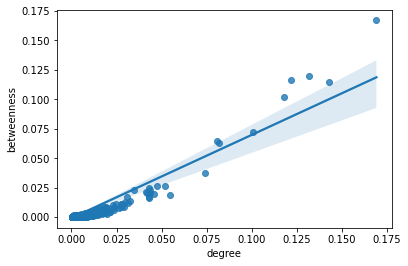

In [32]:
sns.regplot(x=df['degree'], y=df['betweenness'])

In [33]:
df.corr(method="pearson")

,_x,_y,degree,betweenness,closeness,eigenvector,coefficient
_x,1.000000,-0.028804,-0.010321,-0.002945,-0.252534,-0.012002,0.033022
_y,-0.028804,1.000000,-0.000069,-0.000608,-0.070867,0.029716,0.019915
degree,-0.010321,-0.000069,1.000000,0.933146,0.388378,0.911568,-0.384568
betweenness,-0.002945,-0.000608,0.933146,1.000000,0.243727,0.745678,-0.184686
closeness,-0.252534,-0.070867,0.388378,0.243727,1.000000,0.593056,-0.518331
eigenvector,-0.012002,0.029716,0.911568,0.745678,0.593056,1.000000,-0.535528
coefficient,0.033022,0.019915,-0.384568,-0.184686,-0.518331,-0.535528,1.000000


In [34]:
def linear_resplot(result):
    width, height = rcParams['figure.figsize']
    fig, axs = plt.subplots(1, 2, figsize=(2 * width, height))
    ax = sns.scatterplot(x=result.fittedvalues, y=result.resid, ax=axs[0])
    ax.axhline(0)
    sns.histplot(result.resid, ax=axs[1])
    plt.show()

In [35]:
model = smf.ols(data=df, formula='betweenness ~ degree')
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            betweenness   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 4.268e+04
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:44:06   Log-Likelihood:                 32435.
No. Observations:                6337   AIC:                        -6.487e+04
Df Residuals:                    6335   BIC:                        -6.485e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0008    1.9e-05    -40.471      0.000      -0.001      -0.001
degree         0.7064      0.003    206.598      0.000       0.700       0.713
==============================================================================
Omnibus:                     8353.941   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19966323.292
Skew:                           6.445   Prob(JB):                         0.00
Kurtosis:                     277.685   Cond. No.                         188.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.000000000


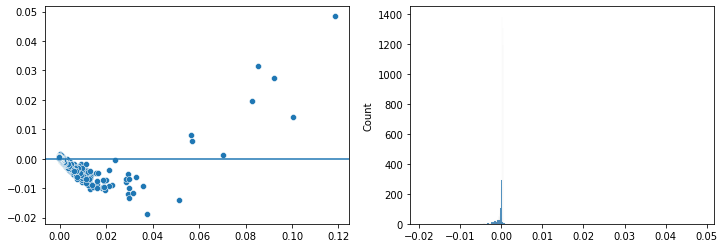

In [36]:
print(f"{result.pvalues['degree']:.09f}")
linear_resplot(result)